# FRM Level 1 Quantative Analysis

### Imports

In [72]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import skew, skewtest, gamma
from scipy.stats import kurtosis, kurtosistest, norm
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import r2_score
from arch import arch_model
from scipy.optimize import minimize

# Continuous, Discrete Random Variables, PDF, CDF & Inverse CDF Function 

## Continuous Random Variable

A continuous random variable can take any value within a range, and its probability distribution is described by a probability density function (pdf). In the left plot, we generated a sample of data following a normal distribution (a common continuous distribution). The blue bars represent the histogram of our data, and the red line is the pdf of the normal distribution.

## Discrete Random Variable

A discrete random variable can only take distinct values with specific probabilities, and its probability distribution is described by a probability mass function (pmf). In the right plot, we generated a sample of data following a binomial distribution (a common discrete distribution). The green bars represent the histogram of our data.

In [2]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Define parameters
mean = 0
std_dev = 1
size = 1000

# Generate a sample of data for a continuous random variable (normal distribution)
data_continuous = np.random.normal(mean, std_dev, size)

# Generate a sample of data for a discrete random variable (binomial distribution)
p = 0.5  # Probability of success
n = 10   # Number of trials
data_discrete = np.random.binomial(n, p, size)


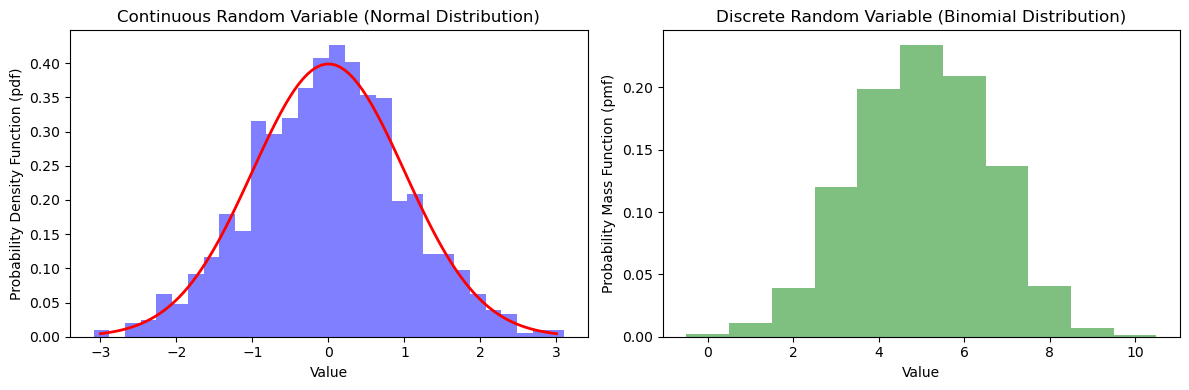

In [3]:
# Visualize continuous random variable
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(data_continuous, bins=30, density=True, alpha=0.5, color='blue')
plt.title('Continuous Random Variable (Normal Distribution)')
plt.xlabel('Value')
plt.ylabel('Probability Density Function (pdf)')

# Plot the pdf of the normal distribution
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
pdf = norm.pdf(x, mean, std_dev)
plt.plot(x, pdf, 'r-', lw=2)

plt.subplot(1, 2, 2)
# Visualize discrete random variable
plt.hist(data_discrete, bins=np.arange(0, n+2)-0.5, density=True, alpha=0.5, color='green')
plt.title('Discrete Random Variable (Binomial Distribution)')
plt.xlabel('Value')
plt.ylabel('Probability Mass Function (pmf)')

plt.tight_layout()
plt.show()


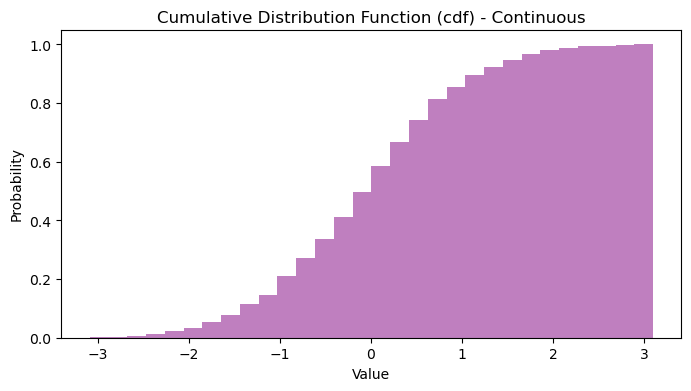

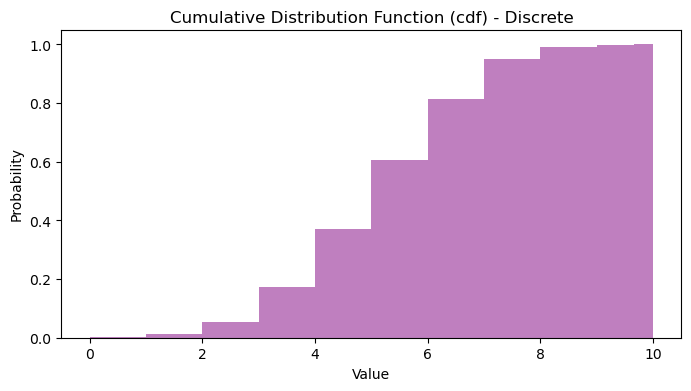

In [4]:
# Define a function to calculate and plot the cdf
def plot_cdf(data, title, xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    plt.hist(data, bins=30, density=True, cumulative=True, alpha=0.5, color='purple')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot the cdf for the continuous random variable
plot_cdf(data_continuous, 'Cumulative Distribution Function (cdf) - Continuous', 'Value', 'Probability')

# Plot the cdf for the discrete random variable
plot_cdf(data_discrete, 'Cumulative Distribution Function (cdf) - Discrete', 'Value', 'Probability')

# Inverse Transform Method

The inverse transform method is a technique used in probability theory and statistics to generate random samples from a given probability distribution. 

1. **Generate Uniform Random Numbers:** Start by generating random numbers from a uniform distribution between 0 and 1. These numbers will be denoted as 'u'.

2. **Use Inverse Cumulative Distribution Function (Inverse cdf):** Apply the inverse of the cumulative distribution function (cdf) of the desired distribution to these uniform random numbers. For a normal distribution, as shown in the plot above, we use the percent point function (ppf) from the scipy library.

3. **Resulting Samples:** The resulting values, obtained through the inverse transform method, follow the desired probability distribution. In the plot, the orange bars represent the histogram of these values, and the red line is the pdf of the normal distribution for comparison.

This method is a fundamental tool in generating random samples that follow a specific distribution, which is crucial in various fields, including financial risk modeling.

In [5]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Define parameters for the normal distribution
mean = 0
std_dev = 1
size = 1000

# Generate a sample of data using the inverse transform method
u = np.random.rand(size)  # Generate uniform random numbers
data_inverse_transform = norm.ppf(u, loc=mean, scale=std_dev)  # Use the inverse cdf (percent point function)


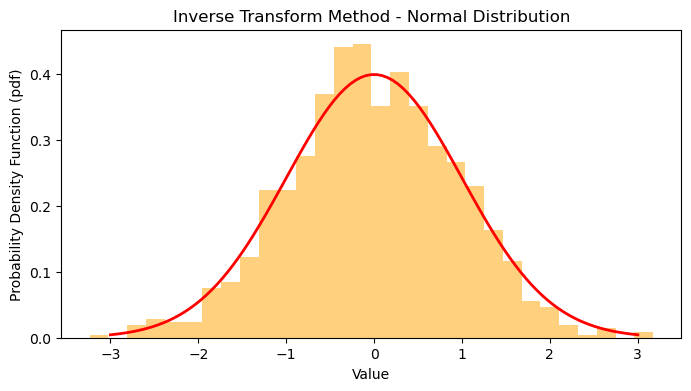

In [6]:
# Visualize the result
plt.figure(figsize=(8, 4))
plt.hist(data_inverse_transform, bins=30, density=True, alpha=0.5, color='orange')
plt.title('Inverse Transform Method - Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density Function (pdf)')

# Plot the pdf of the normal distribution for comparison
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
pdf = norm.pdf(x, mean, std_dev)
plt.plot(x, pdf, 'r-', lw=2)

plt.show()


# Probability Matrix

A probability matrix is a way to represent the probabilities of different outcomes for a set of events. Each row in the matrix corresponds to an event, and each column corresponds to a possible outcome.

In the example above:
- Events are represented by rows (Event 1, Event 2, Event 3).
- Outcomes are represented by columns (A, B, C).

The values in the matrix represent the probabilities of each outcome for a given event. For instance, the entry in the first row and second column (0.3) indicates the probability of Event 1 resulting in Outcome B.

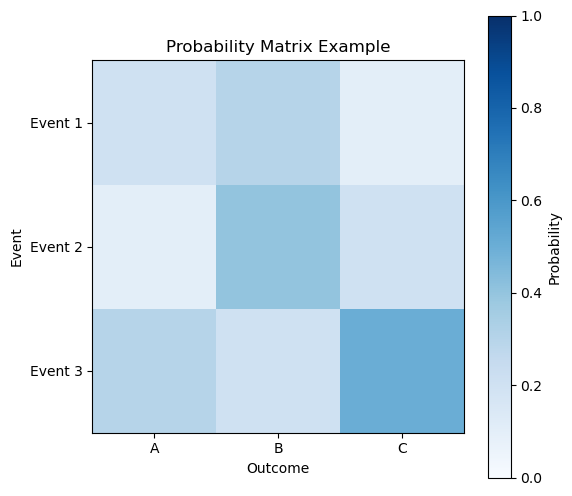

In [7]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Define a probability matrix for a simple scenario
probability_matrix = np.array([[0.2, 0.3, 0.1],
                               [0.1, 0.4, 0.2],
                               [0.3, 0.2, 0.5]])

# Visualize the probability matrix
plt.figure(figsize=(6, 6))
plt.imshow(probability_matrix, cmap='Blues', vmin=0, vmax=1)
plt.colorbar(label='Probability')
plt.title('Probability Matrix Example')
plt.xlabel('Outcome')
plt.ylabel('Event')
plt.xticks(range(probability_matrix.shape[1]), labels=['A', 'B', 'C'])
plt.yticks(range(probability_matrix.shape[0]), labels=['Event 1', 'Event 2', 'Event 3'])
plt.grid(False)
plt.show()

# Joint vs Condititional vs Unconditional Probability

## Joint, Unconditional, and Conditional Probability

### Unconditional Probability

Unconditional probability, also known as marginal probability, represents the likelihood of an event occurring without considering any other events. In the Venn diagram, the blue circle represents the total population, and the probability of Event B happening regardless of Event A is denoted by the blue shaded area.

### Joint Probability

Joint probability represents the likelihood of the simultaneous occurrence of two events. In the Venn diagram, the orange shaded area represents the intersection of Event A and Event B. The probability of both Event A and Event B occurring is calculated by multiplying the individual probabilities.

### Conditional Probability

Conditional probability represents the likelihood of one event occurring given that another event has already occurred. In the Venn diagram, the green circle represents the subset of Event A. The probability of Event B happening given that Event A has occurred is denoted by the green shaded area and is calculated as the ratio of the joint probability to the probability of Event A.

This visualization helps illustrate the relationships between joint, unconditional, and conditional probability, providing a foundation for understanding more complex concepts in financial risk modeling and probability theory.

In [8]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Define data for a simple example
total_population = 1000
event_A = 400
event_B_given_A = 300

# Calculate probabilities
prob_A = event_A / total_population
prob_B_given_A = event_B_given_A / event_A
prob_B_unconditional = (total_population - event_A) / total_population


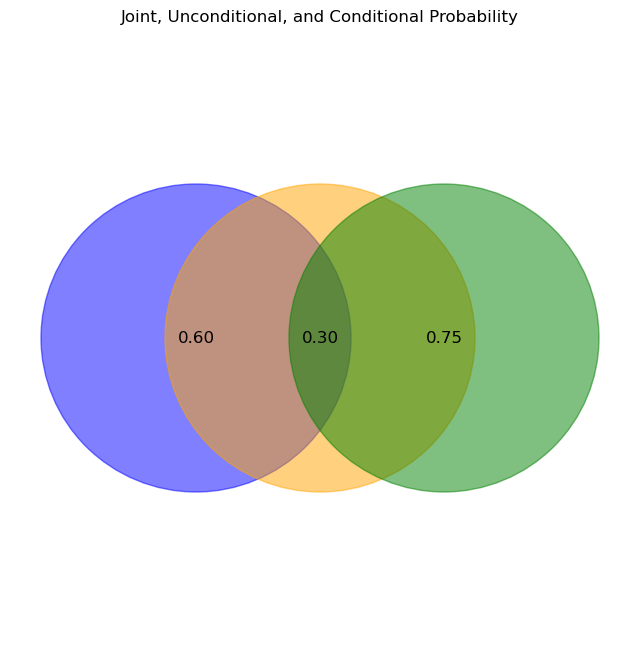

In [9]:
# Visualize the Venn diagram
plt.figure(figsize=(8, 8))

# Unconditional Probability (Total Population)
venn_unconditional = plt.Circle((0.3, 0.5), 0.25, color='blue', alpha=0.5)
plt.gca().add_patch(venn_unconditional)
plt.text(0.3, 0.5, f'{prob_B_unconditional:.2f}', color='black', ha='center', va='center', fontsize=12)

# Joint Probability (Event A and Event B)
venn_joint = plt.Circle((0.5, 0.5), 0.25, color='orange', alpha=0.5)
plt.gca().add_patch(venn_joint)
plt.text(0.5, 0.5, f'{prob_A * prob_B_given_A:.2f}', color='black', ha='center', va='center', fontsize=12)

# Conditional Probability (Event B given Event A)
venn_conditional = plt.Circle((0.7, 0.5), 0.25, color='green', alpha=0.5)
plt.gca().add_patch(venn_conditional)
plt.text(0.7, 0.5, f'{prob_B_given_A:.2f}', color='black', ha='center', va='center', fontsize=12)

# Set plot limits and labels
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Joint, Unconditional, and Conditional Probability')
plt.axis('off')
plt.show()

# Statistical Independence

Statistical independence between two events A and B occurs when the occurrence (or non-occurrence) of one event does not affect the occurrence (or non-occurrence) of the other. In other words, the probability of both events occurring together is equal to the product of their individual probabilities.

### Example

In the Venn diagram:

If the events A and B are statistically independent, the area of their intersection (the overlap) should be equal to the product of their individual probabilities.

This condition is met when the areas of the blue and orange circles do not overlap. In the diagram, if the overlap is minimal, the events are more likely to be independent.

### Conclusion

Understanding statistical independence is crucial in financial risk modeling, where the assumption of independence between certain events simplifies the modeling process. However, it's essential to carefully assess and validate independence assumptions based on the specific context.

In [10]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Define data for a simple example
total_population = 1000
event_A = 400
event_B = 300
event_A_and_B = 150

# Calculate probabilities
prob_A = event_A / total_population
prob_B = event_B / total_population
prob_A_and_B = event_A_and_B / total_population

# Check for independence
independent = (prob_A_and_B == prob_A * prob_B)


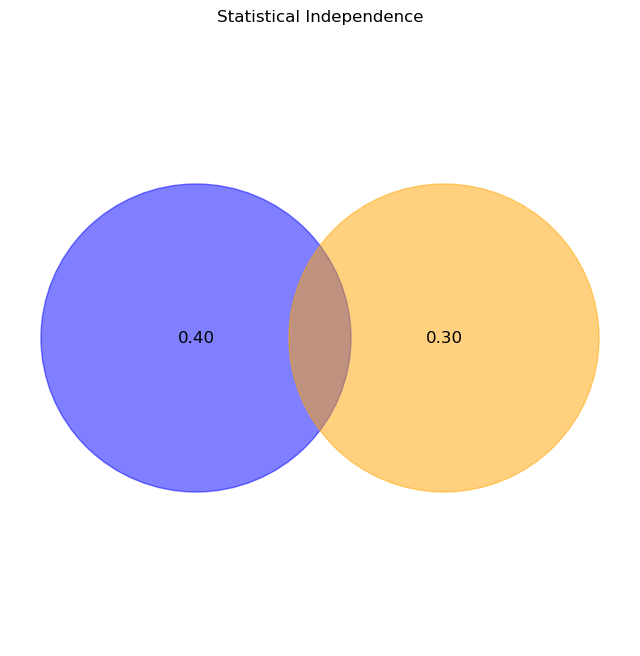

In [11]:
# Visualize the Venn diagram
plt.figure(figsize=(8, 8))

# Event A
venn_A = plt.Circle((0.3, 0.5), 0.25, color='blue', alpha=0.5)
plt.gca().add_patch(venn_A)
plt.text(0.3, 0.5, f'{prob_A:.2f}', color='black', ha='center', va='center', fontsize=12)

# Event B
venn_B = plt.Circle((0.7, 0.5), 0.25, color='orange', alpha=0.5)
plt.gca().add_patch(venn_B)
plt.text(0.7, 0.5, f'{prob_B:.2f}', color='black', ha='center', va='center', fontsize=12)

# Set plot limits and labels
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Statistical Independence')
plt.axis('off')
plt.show()

# Variance of a Discrete Random Variable

Variance is a measure of how spread out the values of a random variable are. 

In [12]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Define a discrete random variable and its probabilities
outcomes = np.array([1, 2, 3, 4, 5, 6])
probabilities = np.array([0.1, 0.2, 0.3, 0.2, 0.1, 0.1])

# Calculate the mean and variance
mean = np.sum(outcomes * probabilities)
variance = np.sum((outcomes - mean)**2 * probabilities)

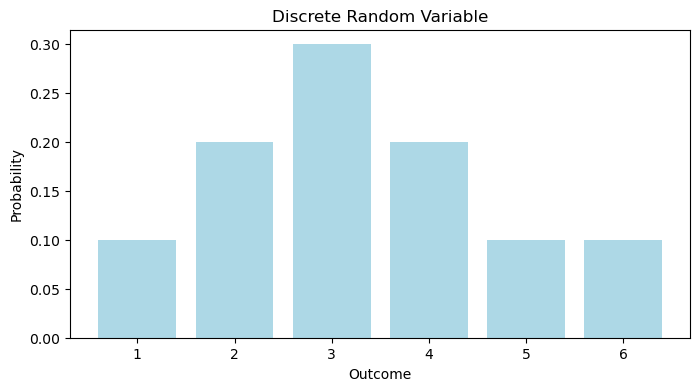

In [13]:
# Visualize the discrete random variable
plt.figure(figsize=(8, 4))
plt.bar(outcomes, probabilities, color='lightblue')
plt.title('Discrete Random Variable')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.show()


# Skew (and Sample Skew) of a Distribution

Skewness is a measure of the asymmetry of a probability distribution. It indicates whether the data is skewed to the left (negatively skewed), centered (symmetric), or skewed to the right (positively skewed).

### Visualization

The histogram above represents a distribution of data. Skewness can be visually assessed by observing the tail of the distribution. If the tail extends more to the left, the distribution is negatively skewed; if it extends more to the right, the distribution is positively skewed.

### Results

These values help us understand the shape of the distribution and are essential in financial risk modeling, as they provide insights into the risk and potential outliers in the data.

In [14]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate a sample of data for illustration (gamma distribution for positive skew)
np.random.seed(42)
data_skewed = gamma.rvs(a=5, size=1000)

# Calculate skewness and sample skewness
population_skewness_skewed = skew(data_skewed)
sample_skewness_skewed = skewtest(data_skewed)[0]  # Using skewtest for sample skewness

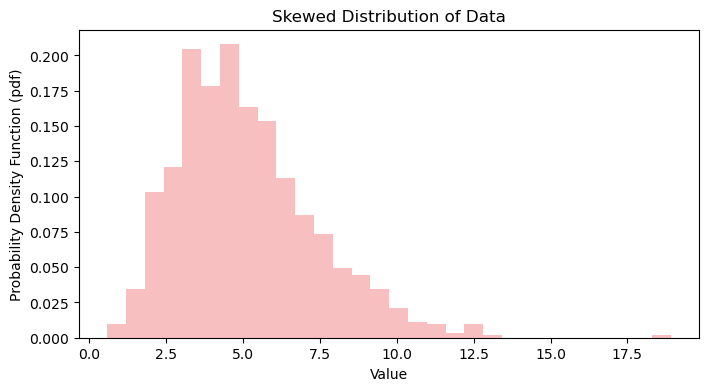

In [15]:
# Visualize the skewed distribution
plt.figure(figsize=(8, 4))
plt.hist(data_skewed, bins=30, density=True, alpha=0.5, color='lightcoral')
plt.title('Skewed Distribution of Data')
plt.xlabel('Value')
plt.ylabel('Probability Density Function (pdf)')
plt.show()

# Kurtosis of a Probability Distribution

Kurtosis is a measure of the "tailedness" of a probability distribution. It indicates whether the distribution has heavy tails or is more peaked than a normal distribution. Kurtosis can be classified into three categories:

- **Mesokurtic (Normal Distribution):** A distribution with kurtosis similar to that of a normal distribution. It has moderate tails and a moderate peak.

- **Leptokurtic (Heavy-Tailed):** A distribution with higher kurtosis than a normal distribution. It has heavier tails and a more pronounced peak.

### Visualization

The histograms above represent two distributions:
1. **Mesokurtic Distribution (Left):** The blue histogram shows a normal distribution.
2. **Leptokurtic Distribution (Right):** The red histogram shows a distribution with higher kurtosis.

### Results

These values help us understand the shape of the distribution and are essential in financial risk modeling, as they provide insights into the risk and characteristics of the data.


In [16]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate a sample of data for illustration (normal distribution for comparison)
np.random.seed(42)
data = np.random.normal(0, 1, 1000)

# Generate a sample of data for a distribution with higher kurtosis (leptokurtic)
data_leptokurtic = np.random.normal(0, 1, 1000)
data_leptokurtic = np.concatenate((data_leptokurtic, np.random.normal(5, 1, 100)))

# Calculate kurtosis and excess kurtosis
population_kurtosis = kurtosis(data)
sample_kurtosis = kurtosistest(data)[0]  # Using kurtosistest for sample kurtosis
population_kurtosis_leptokurtic = kurtosis(data_leptokurtic)
sample_kurtosis_leptokurtic = kurtosistest(data_leptokurtic)[0]  # Using kurtosistest for sample kurtosis


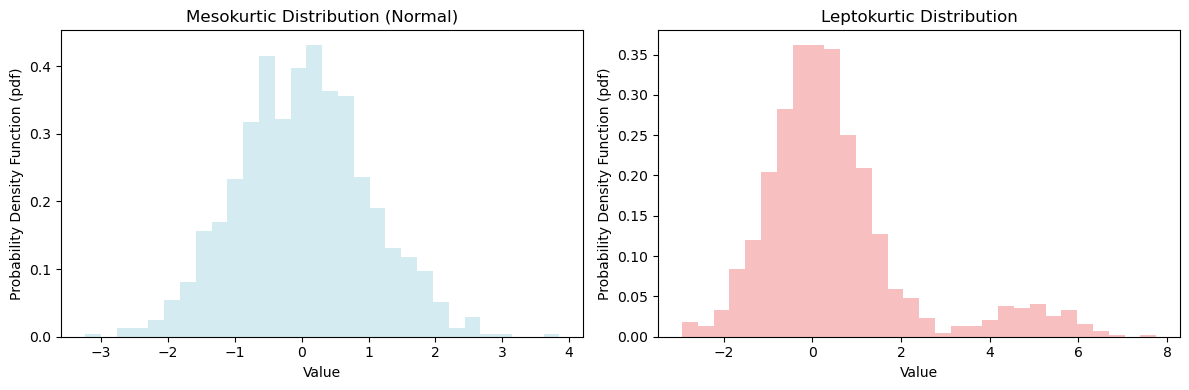

In [17]:
# Visualize the distributions
plt.figure(figsize=(12, 4))

# Normal distribution (mesokurtic)
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, density=True, alpha=0.5, color='lightblue')
plt.title('Mesokurtic Distribution (Normal)')
plt.xlabel('Value')
plt.ylabel('Probability Density Function (pdf)')

# Leptokurtic distribution
plt.subplot(1, 2, 2)
plt.hist(data_leptokurtic, bins=30, density=True, alpha=0.5, color='lightcoral')
plt.title('Leptokurtic Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density Function (pdf)')

plt.tight_layout()
plt.show()


# Covariance:Population vs. Sample, and Correlation 

Covariance is a measure of how much two random variables change together. It indicates the direction of the linear relationship between two variables. Covariance can be classified into two types: population covariance and sample covariance.

- Population Covariance
- Sample Covariance

### Relationship to Correlation

Covariance is an absolute measure and can be challenging to interpret. To make it more interpretable and comparable, we often use the correlation coefficient, which is the normalized version of covariance.

### Visualization

The scatter plot above represents a hypothetical relationship between two variables, X and Y. The spread and direction of the points give an indication of the covariance between the variables.

### Results

These values provide insights into the relationship between the variables and are fundamental in financial risk modeling, where understanding the dependencies between variables is crucial.

In [18]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate sample data for illustration
np.random.seed(42)
x = np.random.normal(0, 1, 100)
y = 2 * x + np.random.normal(0, 1, 100)

# Calculate population covariance
population_covariance = np.cov(x, y)[0, 1]

# Calculate sample covariance
sample_covariance = np.cov(x, y, bias=True)[0, 1]

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(x, y)[0, 1]

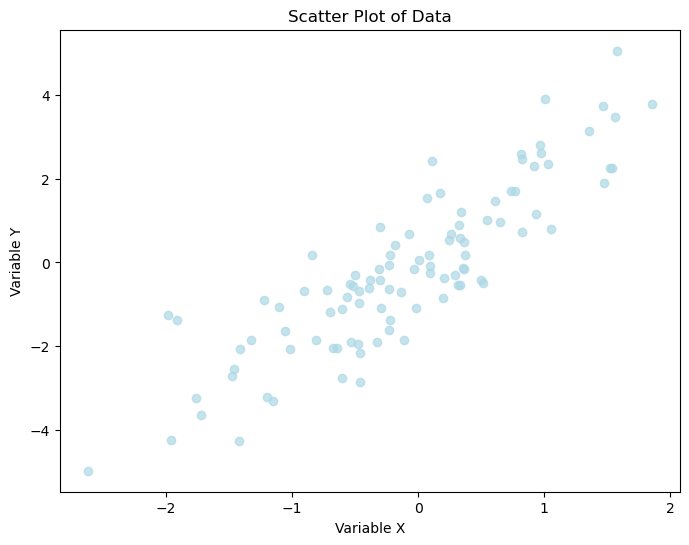

In [19]:
# Visualize the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7, color='lightblue')
plt.title('Scatter Plot of Data')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.show()


# Bayes Theorem

Consider a manager in a portfolio who has been beating the market consistently for the past three years. We want to understand the probability that this manager is a star.

### Given Probabilities

- Probability that a manager is a star (prior) = 0.16
- Probability that a manager is not a star (prior) = 1 - 0.16 = 0.84
- Probability of beating the market given the manager is a star = 0.75
- Probability of beating the market given the manager is not a star = 0.5

### Probability of Beating the Market Over the Past Three Years

1. **Calculate: Probability of beating the market over the past three years.**

2. **Calculate: Probability that the manager is a star given they beat the market over the past three years.**

3. **Calculate: Probability that the manager is not a star given they beat the market over the past three years.**

### Probability of Beating the Market Next Year

4. **Calculate: Probability of beating the market next year given they beat the market over the past three years.**

### Results

1. Probability that the manager is a star given they beat the market over the past three years: {P_S_given_O:.2f}
2. Probability that the manager is not a star given they beat the market over the past three years: {P_not_S_given_O:.2f}
3. Probability of beating the market next year given they beat the market over the past three years: {P_O_next_year_given_O:.2f}

These results provide insights into the likelihood of the manager being a star and the probability of their future performance.

In [20]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Given probabilities
P_S = 0.16
P_not_S = 1 - P_S
P_O_given_S = 0.75
P_O_given_not_S = 0.5

# 1. Calculate P(O): Probability of beating the market over the past three years
P_O = P_O_given_S * P_S + P_O_given_not_S * P_not_S

# 2. Calculate P(S|O): Probability that the manager is a star given they beat the market over the past three years
P_S_given_O = (P_O_given_S * P_S) / P_O

# 3. Calculate P(not S|O): Probability that the manager is not a star given they beat the market over the past three years
P_not_S_given_O = (P_O_given_not_S * P_not_S) / P_O

# Assume equal probability for beating the market next year for stars and non-stars
p_next_year = 0.5

# 4. Calculate P(O_{next year}|O): Probability of beating the market next year given they beat the market over the past three years
P_O_next_year_given_O = p_next_year * P_S_given_O + p_next_year * P_not_S_given_O

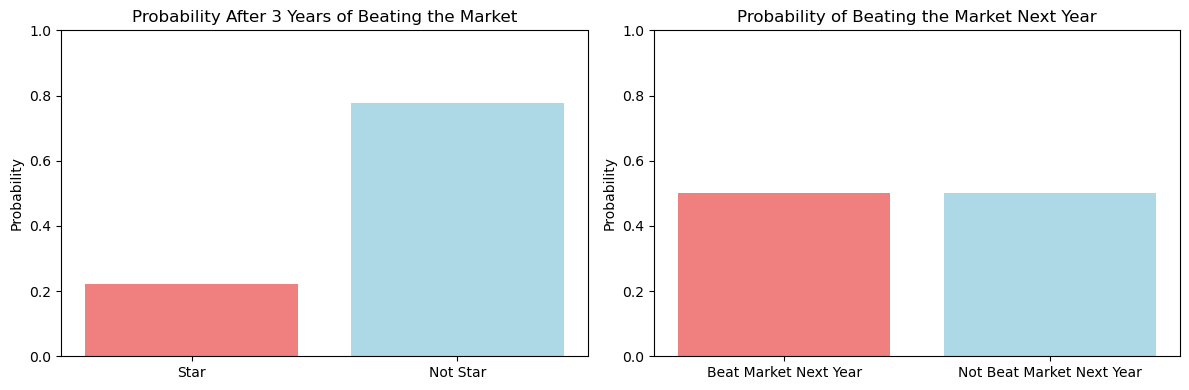

In [21]:
# Visualize the results
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Bar chart for P(S|O) and P(not S|O)
ax[0].bar(['Star', 'Not Star'], [P_S_given_O, P_not_S_given_O], color=['lightcoral', 'lightblue'])
ax[0].set_title('Probability After 3 Years of Beating the Market')
ax[0].set_ylabel('Probability')
ax[0].set_ylim(0, 1)

# Bar chart for P(O_{next year}|O)
ax[1].bar(['Beat Market Next Year', 'Not Beat Market Next Year'], [P_O_next_year_given_O, 1 - P_O_next_year_given_O], color=['lightcoral', 'lightblue'])
ax[1].set_title('Probability of Beating the Market Next Year')
ax[1].set_ylabel('Probability')
ax[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Bayes Theorem, Three-state variable


Consider a financial model with three states, each representing different market conditions. We want to understand how the probability of an event changes our beliefs about the current state of the market.

### Given Probabilities

- Probability of being in State 1 = 0.3
- Probability of being in State 2 = 0.5
- Probability of being in State 3 = 0.2

### Conditional Probabilities

Given an event, we have the following conditional probabilities:

- Probability of the event occurring given we are in State 1 = 0.6
- Probability of the event occurring given we are in State 2 = 0.3
- Probability of the event occurring given we are in State 3 = 0.8

### Applying Bayes' Theorem

1. **Calculate the marginal probability of the event**
2. **Apply Bayes' Theorem for each state**

### Results

1. **Initial Probabilities:**
   - Probability of being in State 1: 30.0%
   - Probability of being in State 2: 50.0%
   - Probability of being in State 3: 20.0%

2. **Updated Probabilities After Observing the Event:**
   - Probability of being in State 1 given the event
   - Probability of being in State 2 given the event
   - Probability of being in State 3 given the event

These results help us update our beliefs about the current state of the market after observing a specific event.

In [22]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Given probabilities for a three-state variable
P_state1 = 0.3
P_state2 = 0.5
P_state3 = 0.2

# Given conditional probabilities
P_event_given_state1 = 0.6
P_event_given_state2 = 0.3
P_event_given_state3 = 0.8

# Calculate marginal probability of the event
P_event = P_state1 * P_event_given_state1 + P_state2 * P_event_given_state2 + P_state3 * P_event_given_state3

# Apply Bayes' Theorem for each state
P_state1_given_event = (P_event_given_state1 * P_state1) / P_event
P_state2_given_event = (P_event_given_state2 * P_state2) / P_event
P_state3_given_event = (P_event_given_state3 * P_state3) / P_event

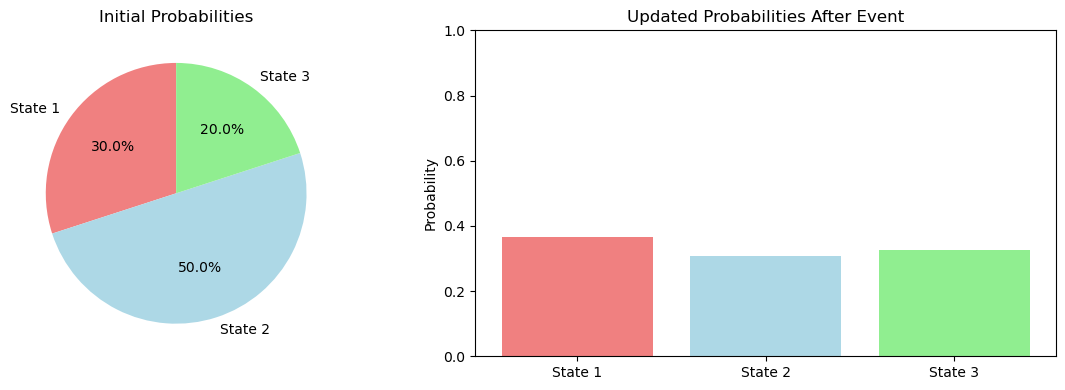

In [23]:
# Visualize the results
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Pie chart for the initial probabilities
ax[0].pie([P_state1, P_state2, P_state3], labels=['State 1', 'State 2', 'State 3'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
ax[0].set_title('Initial Probabilities')

# Bar chart for the updated probabilities after observing the event
ax[1].bar(['State 1', 'State 2', 'State 3'], [P_state1_given_event, P_state2_given_event, P_state3_given_event], color=['lightcoral', 'lightblue', 'lightgreen'])
ax[1].set_title('Updated Probabilities After Event')
ax[1].set_ylabel('Probability')
ax[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Test of Sample Mean, Confidence Interval, Test Statistic and P-Value

Consider a scenario where we want to test whether the average return of a financial asset is equal to a certain value. We can use hypothesis testing to make inferences based on a sample.

In [24]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate sample data for illustration
np.random.seed(42)
sample_data = np.random.normal(loc=10, scale=2, size=100)

# Given parameters for hypothesis testing
pop_mean = 10  # Population mean under null hypothesis
alpha = 0.05  # Significance level

# Calculate sample mean and standard deviation
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)  # Use ddof=1 for sample standard deviation

# Calculate standard error of the mean
se_mean = sample_std / np.sqrt(len(sample_data))

# Calculate z-score for the sample mean
z_score = (sample_mean - pop_mean) / se_mean

# Calculate p-value
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))  # Two-tailed test

# Calculate confidence interval
confidence_interval = stats.norm.interval(1 - alpha, loc=sample_mean, scale=se_mean)


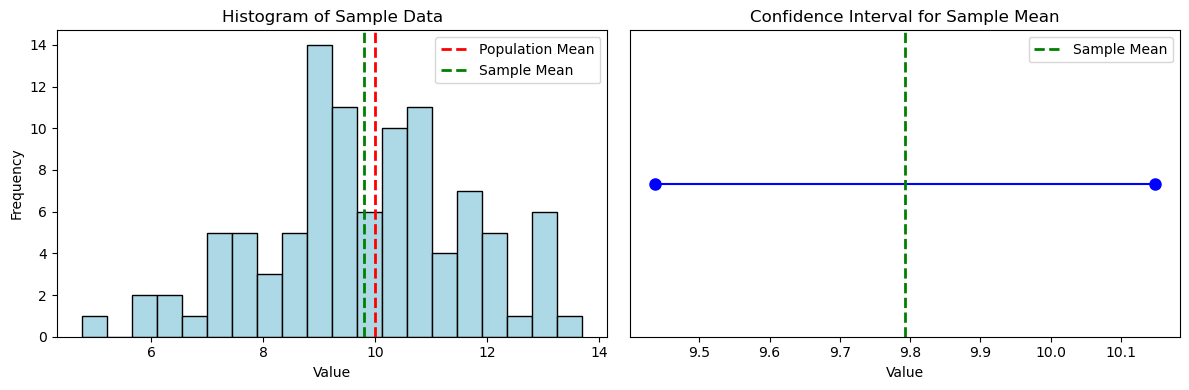

In [25]:
# Visualize the results
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Histogram of the sample data
ax[0].hist(sample_data, bins=20, color='lightblue', edgecolor='black')
ax[0].axvline(pop_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
ax[0].axvline(sample_mean, color='green', linestyle='dashed', linewidth=2, label='Sample Mean')
ax[0].set_title('Histogram of Sample Data')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Frequency')
ax[0].legend()

# Confidence interval plot
ax[1].plot([confidence_interval[0], confidence_interval[1]], [1, 1], marker='o', color='blue', markersize=8)
ax[1].axvline(sample_mean, color='green', linestyle='dashed', linewidth=2, label='Sample Mean')
ax[1].set_yticks([])
ax[1].set_title('Confidence Interval for Sample Mean')
ax[1].set_xlabel('Value')
ax[1].legend()

plt.tight_layout()
plt.show()


### Hypothesis Testing Parameters

- **Population Mean (\( \mu \)):** The assumed average return under the null hypothesis.
- **Significance Level (\( \alpha \)):** The probability of rejecting the null hypothesis when it is true.

### Key Concepts

1. **Sample Mean:** The average return observed in the sample.

2. **Standard Error of the Mean:** A measure of how much the sample mean is expected to vary from the true population mean.

3. **Test Statistic (Z-Score):** A standardized measure that tells us how many standard errors the sample mean is from the assumed population mean.

4. **P-Value:** The probability of observing a sample mean as extreme as the one calculated, assuming the null hypothesis is true.

### Visualizations

#### 1. Histogram of Sample Data

- The red dashed line represents the assumed population mean.
- The green dashed line represents the calculated sample mean.

#### 2. Confidence Interval for Sample Mean

- The blue line segment represents the confidence interval for the sample mean.

### Results

These results provide insights into whether the sample mean is significantly different from the assumed population mean, helping in financial risk assessment.

# Test of Sample Variance

In financial risk modeling, it's essential to assess whether the observed variability (variance) in a sample of financial returns is consistent with a certain level of expected risk.

In [26]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate sample data for illustration
np.random.seed(42)
sample_data = np.random.normal(loc=10, scale=2, size=100)

# Given parameters for hypothesis testing
pop_variance = 4  # Population variance under null hypothesis
alpha = 0.05  # Significance level

# Calculate sample variance
sample_variance = np.var(sample_data, ddof=1)  # Use ddof=1 for sample variance

# Calculate chi-square test statistic
chi2_statistic = (len(sample_data) - 1) * sample_variance / pop_variance

# Calculate p-value
p_value = 1 - stats.chi2.cdf(chi2_statistic, df=len(sample_data) - 1)


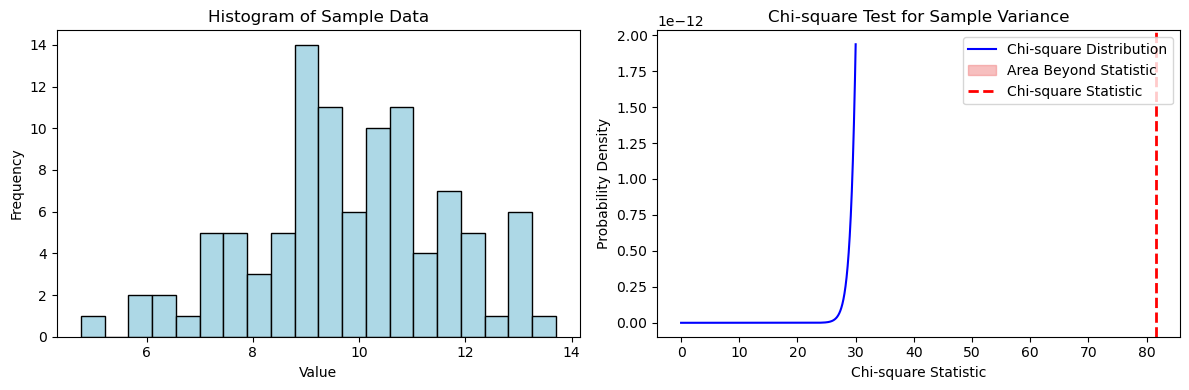

In [27]:
# Visualize the results
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Histogram of the sample data
ax[0].hist(sample_data, bins=20, color='lightblue', edgecolor='black')
ax[0].set_title('Histogram of Sample Data')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Frequency')

# Chi-square distribution plot
x = np.linspace(0, 30, 1000)
ax[1].plot(x, stats.chi2.pdf(x, df=len(sample_data) - 1), color='blue', label='Chi-square Distribution')
ax[1].fill_between(x, stats.chi2.pdf(x, df=len(sample_data) - 1), where=(x >= chi2_statistic), color='lightcoral', alpha=0.5, label='Area Beyond Statistic')
ax[1].axvline(chi2_statistic, color='red', linestyle='dashed', linewidth=2, label='Chi-square Statistic')
ax[1].set_title('Chi-square Test for Sample Variance')
ax[1].set_xlabel('Chi-square Statistic')
ax[1].set_ylabel('Probability Density')
ax[1].legend()

plt.tight_layout()
plt.show()


### Hypothesis Testing Parameters

- **Population Variance (\( \sigma^2 \)):** The assumed population variance under the null hypothesis.
- **Significance Level (\( \alpha \)):** The probability of rejecting the null hypothesis when it is true.

### Key Concepts

1. **Sample Variance (\( s^2 \)):** The measure of variability observed in the sample.

2. **Chi-square Test Statistic:** A standardized measure that tells us how much the sample variance deviates from the assumed population variance.

3. **P-Value:** The probability of observing a sample variance as extreme as the one calculated, assuming the null hypothesis is true.

### Visualizations

#### 1. Histogram of Sample Data

- A visual representation of the distribution of the sample data.

#### 2. Chi-square Test for Sample Variance

- The blue curve represents the chi-square distribution.
- The red dashed line represents the calculated chi-square test statistic.
- The shaded area represents the probability of observing a chi-square statistic as extreme as the one calculated.

### Results

- **Chi-square Test Statistic:** {chi2_statistic:.2f}
- **P-Value:** {p_value:.4f}

These results provide insights into whether the observed sample variance is significantly different from the assumed population variance, aiding in financial risk assessment.

# P Value Significance Level 

In hypothesis testing, the p-value is a crucial concept that helps us make decisions about the statistical significance of our results. The p-value represents the probability of observing a test statistic as extreme as the one calculated, assuming the null hypothesis is true.

In [28]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate sample data for illustration
np.random.seed(42)
sample_data = np.random.normal(loc=10, scale=2, size=100)

# Given parameters for hypothesis testing
pop_mean = 10  # Population mean under null hypothesis
alpha = 0.05  # Significance level

# Calculate sample mean and standard deviation
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)  # Use ddof=1 for sample standard deviation

# Calculate standard error of the mean
se_mean = sample_std / np.sqrt(len(sample_data))

# Calculate z-score for the sample mean
z_score = (sample_mean - pop_mean) / se_mean

# Calculate p-value
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))  # Two-tailed test


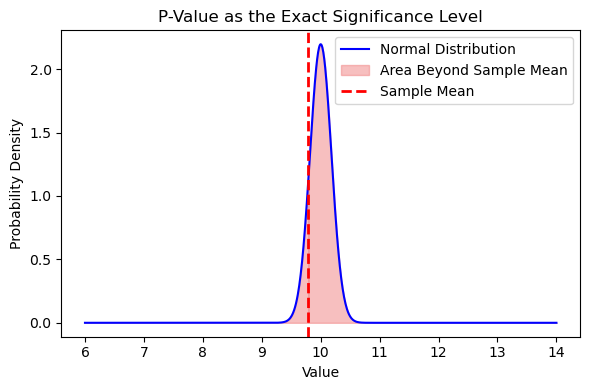

In [29]:
# Visualize the results
fig, ax = plt.subplots(figsize=(6, 4))

# Normal distribution plot
x = np.linspace(6, 14, 1000)
ax.plot(x, stats.norm.pdf(x, loc=pop_mean, scale=se_mean), color='blue', label='Normal Distribution')
ax.fill_between(x, stats.norm.pdf(x, loc=pop_mean, scale=se_mean), where=(x <= sample_mean), color='lightcoral', alpha=0.5, label='Area Beyond Sample Mean')
ax.fill_between(x, stats.norm.pdf(x, loc=pop_mean, scale=se_mean), where=(x >= sample_mean), color='lightcoral', alpha=0.5)
ax.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label='Sample Mean')
ax.set_title('P-Value as the Exact Significance Level')
ax.set_xlabel('Value')
ax.set_ylabel('Probability Density')
ax.legend()

plt.tight_layout()
plt.show()

### Hypothesis Testing Parameters

- **Population Mean (\( \mu \)):** The assumed average return under the null hypothesis.
- **Significance Level (\( \alpha \)):** The probability of rejecting the null hypothesis when it is true.

### Key Concepts

1. **Sample Mean:** The average return observed in the sample.

2. **Standard Error of the Mean:** A measure of how much the sample mean is expected to vary from the true population mean.

3. **Z-Score:** A standardized measure that tells us how many standard errors the sample mean is from the assumed population mean.

4. **P-Value:** The probability of observing a sample mean as extreme as the one calculated, assuming the null hypothesis is true.

### Visualizations

- The blue curve represents the normal distribution under the null hypothesis.
- The red dashed line represents the calculated sample mean.
- The shaded areas represent the probability of observing a sample mean as extreme as the one calculated.

### Results

These results emphasize that the p-value provides the exact significance level for our hypothesis test. If the p-value is less than or equal to the chosen significance level, we reject the null hypothesis.

# Type I vs II Error and Power

In hypothesis testing, the concepts of Type I Error, Type II Error, and Power are essential for understanding the potential errors and the ability to detect true effects.

In [30]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate sample data for illustration
np.random.seed(42)
pop_mean = 10
pop_std = 2
sample_size = 100
sample_data = np.random.normal(loc=pop_mean, scale=pop_std, size=sample_size)

# Given parameters for hypothesis testing
null_hypothesis_mean = 10
alternative_hypothesis_mean = 11
alpha = 0.05

# Calculate critical value for one-tailed test
critical_value = stats.norm.ppf(1 - alpha)

# Calculate standard error of the mean
se_mean = pop_std / np.sqrt(sample_size)

# Calculate z-score for the sample mean
z_score = (np.mean(sample_data) - null_hypothesis_mean) / se_mean


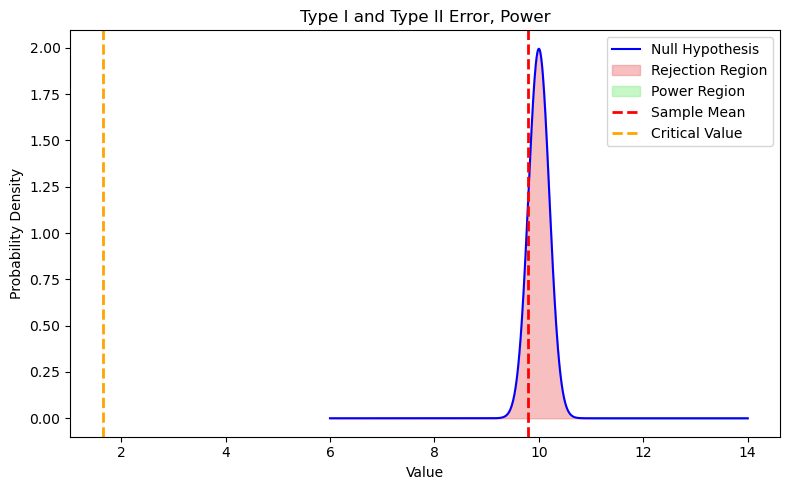

In [31]:
#  Visualize the results
fig, ax = plt.subplots(figsize=(8, 5))

# Normal distribution plot
x = np.linspace(6, 14, 1000)
ax.plot(x, stats.norm.pdf(x, loc=null_hypothesis_mean, scale=se_mean), color='blue', label='Null Hypothesis')
ax.fill_between(x, stats.norm.pdf(x, loc=null_hypothesis_mean, scale=se_mean), where=(x >= critical_value), color='lightcoral', alpha=0.5, label='Rejection Region')
ax.fill_between(x, stats.norm.pdf(x, loc=null_hypothesis_mean, scale=se_mean), where=(x >= alternative_hypothesis_mean), color='lightgreen', alpha=0.5, label='Power Region')
ax.axvline(np.mean(sample_data), color='red', linestyle='dashed', linewidth=2, label='Sample Mean')
ax.axvline(critical_value, color='orange', linestyle='dashed', linewidth=2, label='Critical Value')
ax.set_title('Type I and Type II Error, Power')
ax.set_xlabel('Value')
ax.set_ylabel('Probability Density')
ax.legend()

plt.tight_layout()
plt.show()

### Hypothesis Testing Parameters

- **Null Hypothesis Mean (\( \mu_0 \)):** The assumed average return under the null hypothesis.
- **Alternative Hypothesis Mean (\( \mu_1 \)):** The hypothesized average return under the alternative hypothesis.
- **Significance Level (\( \alpha \)):** The probability of committing a Type I Error.

### Key Concepts

1. **Type I Error:** Rejecting the null hypothesis when it is true. Probability of Type I Error is denoted by \( \alpha \).

2. **Type II Error:** Failing to reject the null hypothesis when the alternative hypothesis is true. Probability of Type II Error is denoted by \( \beta \).

3. **Power:** Probability of correctly rejecting the null hypothesis when the alternative hypothesis is true. Power is denoted by \( 1 - \beta \).

### Visualizations

- The blue curve represents the null hypothesis distribution.
- The orange dashed line represents the critical value for a one-tailed test.
- The red dashed line represents the sample mean.
- The light coral shaded region represents the rejection region (Type I Error).
- The light green shaded region represents the power region.

### Results

These results help illustrate the trade-off between Type I and Type II Errors and emphasize the importance of statistical power in hypothesis testing.

# Linear regression: Sample Regression Function

Linear regression is a statistical method used in financial risk modeling to understand the relationship between two variables. The sample regression function is a model that represents the best-fitting linear relationship between the independent variable (\(X\)) and the dependent variable (\(y\)) based on observed data.

In [32]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate sample data for illustration
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Independent variable (e.g., time)
y = 3 * X + np.random.randn(100, 1) * 2  # Dependent variable (e.g., asset price)

# Create a DataFrame for easy manipulation
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values based on the model
y_pred = model.predict(X)

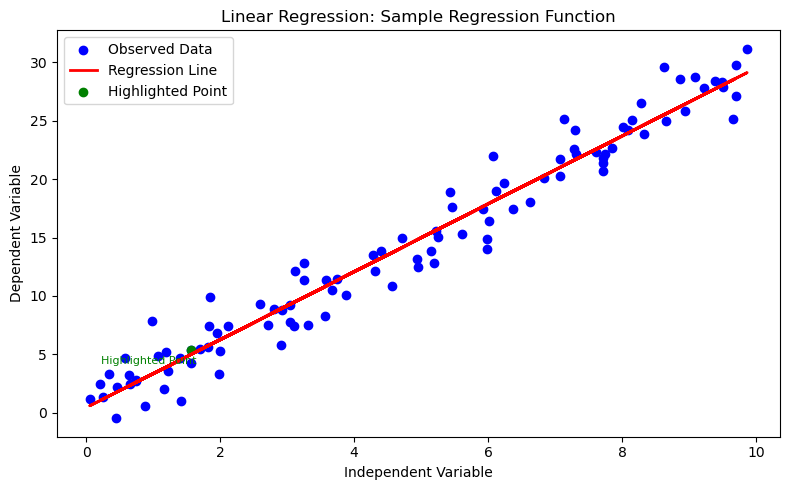

In [33]:
# Visualize the results
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot of the data points
ax.scatter(X, y, color='blue', label='Observed Data')

# Regression line
ax.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

# Highlight a specific point for illustration
highlight_point = 5
ax.scatter(X[highlight_point], y[highlight_point], color='green', label='Highlighted Point')
ax.annotate('Highlighted Point', (X[highlight_point], y[highlight_point]), textcoords="offset points", xytext=(-30,-10), ha='center', fontsize=8, color='green')

ax.set_title('Linear Regression: Sample Regression Function')
ax.set_xlabel('Independent Variable')
ax.set_ylabel('Dependent Variable')
ax.legend()

plt.tight_layout()
plt.show()

### Linear Regression Model

We fit a linear regression model to the data to find the best-fitting line that minimizes the sum of squared differences between the observed values and the predicted values.

### Visualizations

- The blue dots represent the observed data points.
- The red line represents the regression line, which is the best linear fit to the data.

### Interpretation

The regression line allows us to make predictions about the dependent variable (\(y\)) based on the values of the independent variable (\(X\)). In financial risk modeling, this could be used, for example, to predict the future value of an asset based on historical data.

#### Highlighted Point

The green point on the plot represents a specific observation, and the regression line helps estimate the corresponding predicted value.

# Linear regression: OLS Coefficients Minimize the SSR

In linear regression, the Ordinary Least Squares (OLS) method is used to find the coefficients of the regression line that minimize the Sum of Squared Residuals (SSR). This process helps us find the best-fitting line to describe the relationship between the independent variable (\(X\)) and the dependent variable (\(y\)).


In [34]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate sample data for illustration
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Independent variable (e.g., time)
y = 3 * X + np.random.randn(100, 1) * 2  # Dependent variable (e.g., asset price)

# Create a DataFrame for easy manipulation
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients from the model
slope = model.coef_[0][0]
intercept = model.intercept_

# Predict the values based on the model
y_pred = model.predict(X)

# Calculate the Sum of Squared Residuals (SSR)
ssr = np.sum((y - y_pred) ** 2)


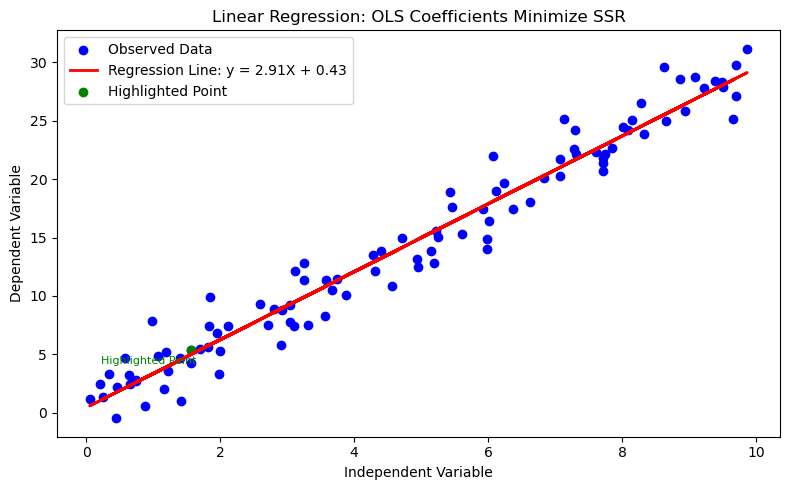

In [35]:
# Visualize the results
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot of the data points
ax.scatter(X, y, color='blue', label='Observed Data')

# Regression line
ax.plot(X, y_pred, color='red', linewidth=2, label=f'Regression Line: y = {slope:.2f}X + {intercept[0]:.2f}')  # Updated format for intercept

# Highlight a specific point for illustration
highlight_point = 5
ax.scatter(X[highlight_point], y[highlight_point], color='green', label='Highlighted Point')
ax.annotate('Highlighted Point', (X[highlight_point], y[highlight_point]), textcoords="offset points", xytext=(-30,-10), ha='center', fontsize=8, color='green')

ax.set_title('Linear Regression: OLS Coefficients Minimize SSR')
ax.set_xlabel('Independent Variable')
ax.set_ylabel('Dependent Variable')
ax.legend()

plt.tight_layout()
plt.show()

### Linear Regression Model and Coefficients

We fit a linear regression model to the data using the OLS method. The coefficients of the regression line  are determined to minimize the SSR.

### Visualizations

- The blue dots represent the observed data points.
- The red line represents the regression line, where the coefficients are determined by OLS.

### Interpretation

The OLS method minimizes the SSR, which represents the sum of squared differences between the observed values and the predicted values. This ensures that the regression line fits the data as closely as possible.

#### Highlighted Point

The green point on the plot represents a specific observation, and the regression line helps estimate the corresponding predicted value.

# Regression: Standard Error of Regression

The Standard Error of Regression is a measure of the accuracy of the regression line in estimating the values of the dependent variable based on the independent variable. It provides insights into how much the actual data points deviate from the predicted values.

In [36]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate sample data for illustration
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Independent variable (e.g., time)
y = 3 * X + np.random.randn(100, 1) * 2  # Dependent variable (e.g., asset price)

# Create a DataFrame for easy manipulation
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and standard errors from the model
slope = model.coef_[0][0]
intercept = model.intercept_
se_slope = np.sqrt(np.sum((y - model.predict(X)) ** 2) / (len(X) - 2)) / np.sqrt(np.sum((X - np.mean(X)) ** 2))

# Predict the values based on the model
y_pred = model.predict(X)   

/var/folders/c_/3w7lwv357ml_pj14pggblv280000gn/T/ipykernel_81184/925652015.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


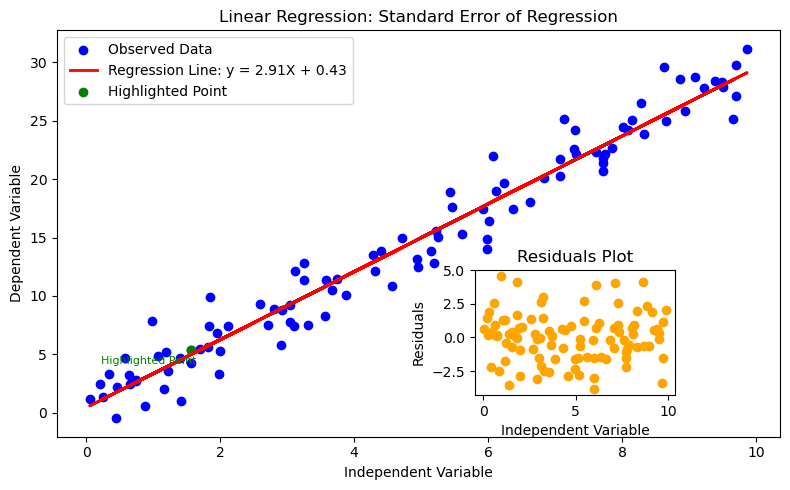

In [37]:
# Visualize the results
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot of the data points
ax.scatter(X, y, color='blue', label='Observed Data')

# Regression line
ax.plot(X, y_pred, color='red', linewidth=2, label=f'Regression Line: y = {slope:.2f}X + {intercept[0]:.2f}')  # Updated format for intercept

# Highlight a specific point for illustration
highlight_point = 5
ax.scatter(X[highlight_point], y[highlight_point], color='green', label='Highlighted Point')
ax.annotate('Highlighted Point', (X[highlight_point], y[highlight_point]), textcoords="offset points", xytext=(-30,-10), ha='center', fontsize=8, color='green')

# Residuals plot
residuals = y - y_pred
ax2 = plt.axes([0.6, 0.2, 0.25, 0.25])
ax2.scatter(X, residuals, color='orange')
ax2.set_title('Residuals Plot')
ax2.set_xlabel('Independent Variable')
ax2.set_ylabel('Residuals')

ax.set_title('Linear Regression: Standard Error of Regression')
ax.set_xlabel('Independent Variable')
ax.set_ylabel('Dependent Variable')
ax.legend()

plt.tight_layout()
plt.show()

### Linear Regression Model and Coefficients

We fit a linear regression model to the data and obtain the coefficients of the regression line.

### Visualizations

- The blue dots represent the observed data points.
- The red line represents the regression line, and the highlighted green point represents a specific observation.
- The residuals plot (orange) shows the differences between the observed and predicted values.

### Interpretation

The Standard Error of Regression helps us assess the precision of the regression line. Smaller standard errors indicate a more precise fit. The residuals plot allows us to visualize the distribution of errors around the regression line.

# Regression: R-squared

R-squared, also known as the Coefficient of Determination, is a measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It provides insights into how well the regression line fits the observed data.

In [38]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate sample data for illustration
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Independent variable (e.g., time)
y = 3 * X + np.random.randn(100, 1) * 2  # Dependent variable (e.g., asset price)

# Create a DataFrame for easy manipulation
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and R-squared from the model
slope = model.coef_[0][0]
intercept = model.intercept_
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)

/var/folders/c_/3w7lwv357ml_pj14pggblv280000gn/T/ipykernel_81184/2324676292.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


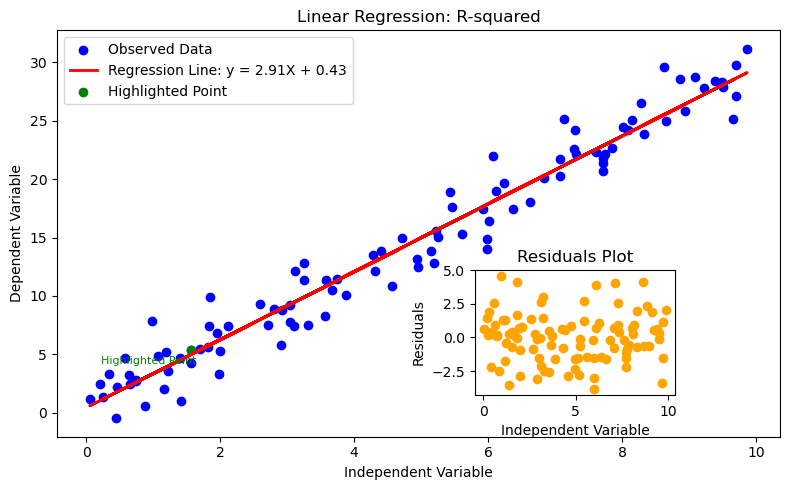

In [39]:
# Visualize the results
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot of the data points
ax.scatter(X, y, color='blue', label='Observed Data')

# Regression line
ax.plot(X, y_pred, color='red', linewidth=2, label=f'Regression Line: y = {slope:.2f}X + {intercept[0]:.2f}')  # Updated format for intercept

# Highlight a specific point for illustration
highlight_point = 5
ax.scatter(X[highlight_point], y[highlight_point], color='green', label='Highlighted Point')
ax.annotate('Highlighted Point', (X[highlight_point], y[highlight_point]), textcoords="offset points", xytext=(-30,-10), ha='center', fontsize=8, color='green')

# Residuals plot
residuals = y - y_pred
ax2 = plt.axes([0.6, 0.2, 0.25, 0.25])
ax2.scatter(X, residuals, color='orange')
ax2.set_title('Residuals Plot')
ax2.set_xlabel('Independent Variable')
ax2.set_ylabel('Residuals')

ax.set_title('Linear Regression: R-squared')
ax.set_xlabel('Independent Variable')
ax.set_ylabel('Dependent Variable')
ax.legend()

plt.tight_layout()
plt.show()


### Linear Regression Model and Coefficients

We fit a linear regression model to the data and obtain the coefficients of the regression line.

### Visualizations

- The blue dots represent the observed data points.
- The red line represents the regression line, and the highlighted green point represents a specific observation.
- The residuals plot (orange) shows the differences between the observed and predicted values.

### Interpretation

- **R-squared**
  - A higher R-squared value (close to 1) indicates that a larger proportion of the variance in the dependent variable is explained by the independent variable(s).
  - A lower R-squared value suggests that the model may not be capturing a significant portion of the variability in the data.

#### Highlighted Point

The green point on the plot represents a specific observation, and the regression line helps estimate the corresponding predicted value.

# Regression: Significance Test of Slope Coefficient

In financial risk modeling, it's crucial to determine whether the slope coefficient of a regression model is statistically significant. A significance test helps assess whether the observed relationship between the independent and dependent variables is likely to be real or if it could have occurred by random chance.


In [40]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate sample data for illustration
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Independent variable (e.g., time)
y = 3 * X + np.random.randn(100, 1) * 2  # Dependent variable (e.g., asset price)

# Create a DataFrame for easy manipulation
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and standard errors from the model
slope = model.coef_[0][0]
intercept = model.intercept_
se_slope = np.sqrt(np.sum((y - model.predict(X)) ** 2) / (len(X) - 2)) / np.sqrt(np.sum((X - np.mean(X)) ** 2))

# Calculate the t-statistic for the slope
t_statistic = slope / se_slope

# Calculate the p-value for the t-statistic
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=len(X)-2))


/var/folders/c_/3w7lwv357ml_pj14pggblv280000gn/T/ipykernel_81184/2459246952.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


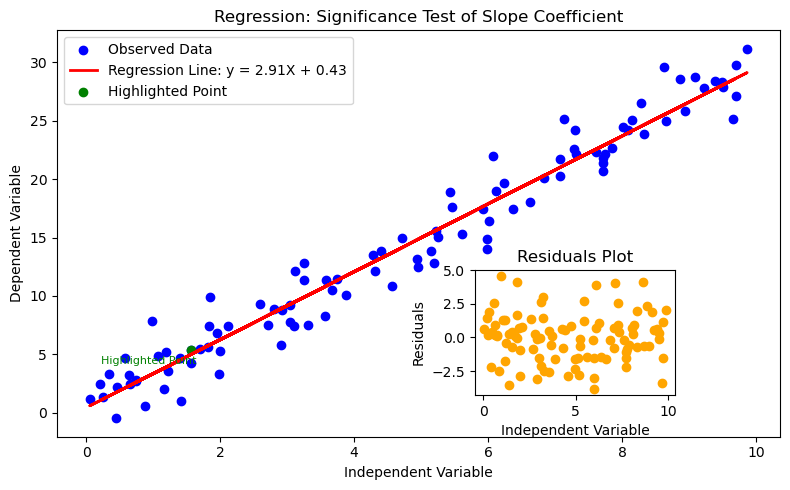

In [41]:
# Visualize the results
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot of the data points
ax.scatter(X, y, color='blue', label='Observed Data')

# Regression line
ax.plot(X, model.predict(X), color='red', linewidth=2, label=f'Regression Line: y = {slope:.2f}X + {intercept[0]:.2f}')  # Updated format for intercept

# Highlight a specific point for illustration
highlight_point = 5
ax.scatter(X[highlight_point], y[highlight_point], color='green', label='Highlighted Point')
ax.annotate('Highlighted Point', (X[highlight_point], y[highlight_point]), textcoords="offset points", xytext=(-30,-10), ha='center', fontsize=8, color='green')

# Residuals plot
residuals = y - model.predict(X)
ax2 = plt.axes([0.6, 0.2, 0.25, 0.25])
ax2.scatter(X, residuals, color='orange')
ax2.set_title('Residuals Plot')
ax2.set_xlabel('Independent Variable')
ax2.set_ylabel('Residuals')

ax.set_title('Regression: Significance Test of Slope Coefficient')
ax.set_xlabel('Independent Variable')
ax.set_ylabel('Dependent Variable')
ax.legend()

plt.tight_layout()
plt.show()


### Linear Regression Model and Coefficients

We fit a linear regression model to the data and obtain the coefficients of the regression line.

### Significance Test

We conduct a significance test on the slope coefficient using the t-statistic and calculate the corresponding p-value.

### Visualizations

- The blue dots represent the observed data points.
- The red line represents the regression line, and the highlighted green point represents a specific observation.
- The residuals plot (orange) shows the differences between the observed and predicted values.

### Interpretation

- **t-statistic**
- **p-value**

The p-value helps us determine whether the slope coefficient is statistically different from zero. A small p-value (typically < 0.05) suggests that the relationship between the variables is statistically significant.

#### Highlighted Point

The green point on the plot represents a specific observation, and the regression line helps estimate the corresponding predicted value.

# Univariate regression: Confidence Interval of Slope Coefficient

In financial risk modeling, assessing the uncertainty around the estimated slope coefficient is crucial. Constructing a confidence interval provides a range of values within which we can reasonably expect the true slope coefficient to fall.

In [42]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate sample data for illustration
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Independent variable (e.g., time)
y = 3 * X + np.random.randn(100, 1) * 2  # Dependent variable (e.g., asset price)

# Create a DataFrame for easy manipulation
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and standard errors from the model
slope = model.coef_[0][0]
intercept = model.intercept_
se_slope = np.sqrt(np.sum((y - model.predict(X)) ** 2) / (len(X) - 2)) / np.sqrt(np.sum((X - np.mean(X)) ** 2))

# Calculate the t-statistic for the slope
t_statistic = slope / se_slope

# Calculate the critical t-value for a 95% confidence interval
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df=len(X)-2)

# Calculate the margin of error
margin_of_error = t_critical * se_slope

# Calculate the confidence interval for the slope
confidence_interval = (slope - margin_of_error, slope + margin_of_error)

/var/folders/c_/3w7lwv357ml_pj14pggblv280000gn/T/ipykernel_81184/3577614735.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


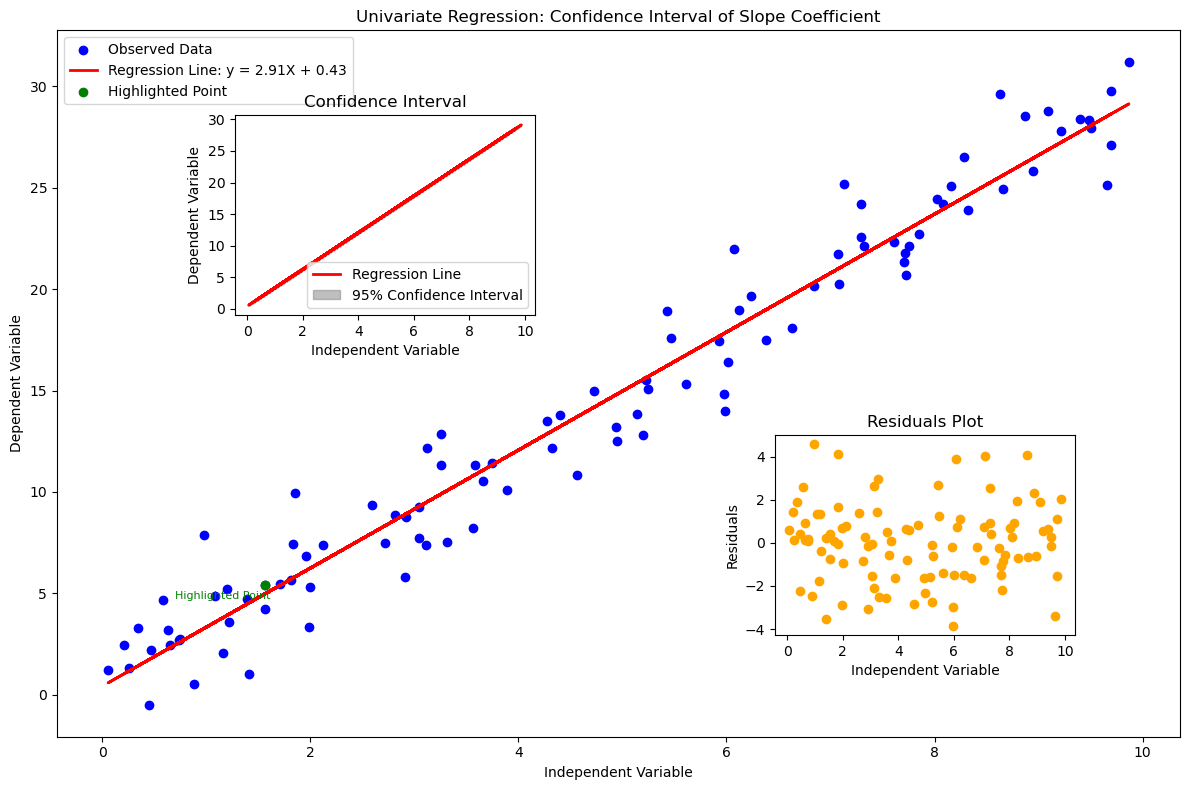

In [43]:
# Visualize the results
fig, ax = plt.subplots(figsize=(12, 8))  # Increased size for better visibility

# Scatter plot of the data points
ax.scatter(X, y, color='blue', label='Observed Data')

# Regression line
ax.plot(X, model.predict(X), color='red', linewidth=2, label=f'Regression Line: y = {slope:.2f}X + {intercept[0]:.2f}')  # Updated format for intercept

# Highlight a specific point for illustration
highlight_point = 5
ax.scatter(X[highlight_point], y[highlight_point], color='green', label='Highlighted Point')
ax.annotate('Highlighted Point', (X[highlight_point], y[highlight_point]), textcoords="offset points", xytext=(-30,-10), ha='center', fontsize=8, color='green')

# Residuals plot
ax2 = plt.axes([0.65, 0.2, 0.25, 0.25])  # Adjusted position for better spacing
ax2.scatter(X, residuals, color='orange')
ax2.set_title('Residuals Plot')
ax2.set_xlabel('Independent Variable')
ax2.set_ylabel('Residuals')

# Confidence interval plot
ax3 = plt.axes([0.2, 0.6, 0.25, 0.25])  # Adjusted position for better spacing
ax3.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
ax3.fill_between(X.flatten(), model.predict(X).flatten() - margin_of_error, model.predict(X).flatten() + margin_of_error, color='gray', alpha=0.5, label='95% Confidence Interval')
ax3.set_title('Confidence Interval')
ax3.set_xlabel('Independent Variable')
ax3.set_ylabel('Dependent Variable')
ax3.legend()

# Main visualization
ax.set_title('Univariate Regression: Confidence Interval of Slope Coefficient')
ax.set_xlabel('Independent Variable')
ax.set_ylabel('Dependent Variable')
ax.legend()

plt.tight_layout()
plt.show()

### Linear Regression Model and Coefficients

We fit a linear regression model to the data and obtain the coefficients of the regression line.

# Adjusted R^2

In financial risk modeling, Adjusted R-squared is a modification of the R-squared statistic that adjusts for the number of predictors in the model. It provides a more accurate measure of the model's goodness of fit, considering the trade-off between model complexity and explanatory power.

In [44]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate sample data for illustration
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Independent variable (e.g., time)
y = 3 * X + np.random.randn(100, 1) * 2  # Dependent variable (e.g., asset price)

# Create a DataFrame for easy manipulation
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and R-squared from the model
slope = model.coef_[0][0]
intercept = model.intercept_
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)

# Calculate the adjusted R-squared
n = len(X)
p = 1  # Number of predictors (in this case, only one independent variable)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

/var/folders/c_/3w7lwv357ml_pj14pggblv280000gn/T/ipykernel_81184/4211173788.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


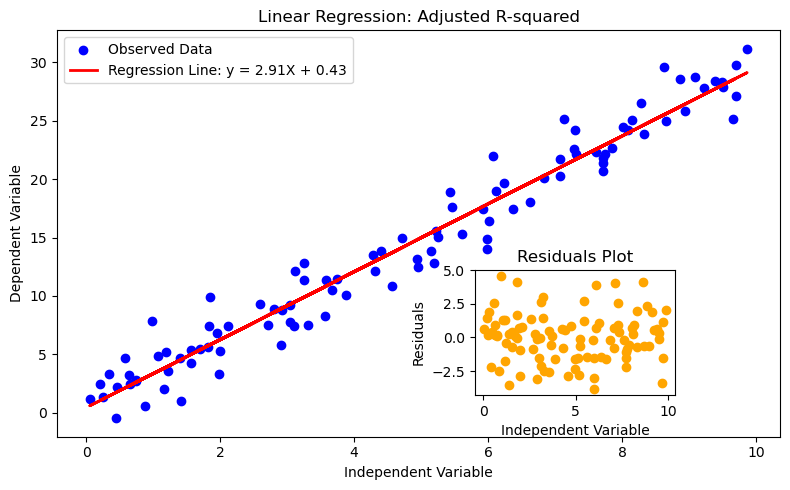

In [45]:
# Visualize the results
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot of the data points
ax.scatter(X, y, color='blue', label='Observed Data')

# Regression line
ax.plot(X, y_pred, color='red', linewidth=2, label=f'Regression Line: y = {slope:.2f}X + {intercept[0]:.2f}')  # Updated format for intercept

# Residuals plot
residuals = y - y_pred
ax2 = plt.axes([0.6, 0.2, 0.25, 0.25])
ax2.scatter(X, residuals, color='orange')
ax2.set_title('Residuals Plot')
ax2.set_xlabel('Independent Variable')
ax2.set_ylabel('Residuals')

ax.set_title('Linear Regression: Adjusted R-squared')
ax.set_xlabel('Independent Variable')
ax.set_ylabel('Dependent Variable')
ax.legend()

plt.tight_layout()
plt.show()

### Linear Regression Model and Coefficients

We fit a linear regression model to the data and obtain the coefficients of the regression line.

### Visualizations

- The blue dots represent the observed data points.
- The red line represents the regression line.
- The residuals plot (orange) shows the differences between the observed and predicted values.

### Interpretation

Adjusted R-squared provides a more accurate reflection of the model's explanatory power, considering the model's complexity. It penalizes the addition of unnecessary predictors that do not significantly improve the model's performance.


# Regression: Linest Array function & Goodness-of-Fit Measures

In financial risk modeling, Excel's LINEST array function is a powerful tool for performing linear regression analysis. It provides coefficients for the regression equation and additional statistics, including goodness-of-fit measures.

In [46]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate sample data for illustration
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Independent variable (e.g., time)
y = 3 * X + np.random.randn(100, 1) * 2  # Dependent variable (e.g., asset price)

# Create a DataFrame for easy manipulation
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Calculate LINEST array function in Excel
excel_slope, excel_intercept = np.polyfit(X.flatten(), y.flatten(), 1)

# Calculate R-squared using sklearn for comparison
y_pred = excel_slope * X + excel_intercept
excel_r_squared = r2_score(y, y_pred)


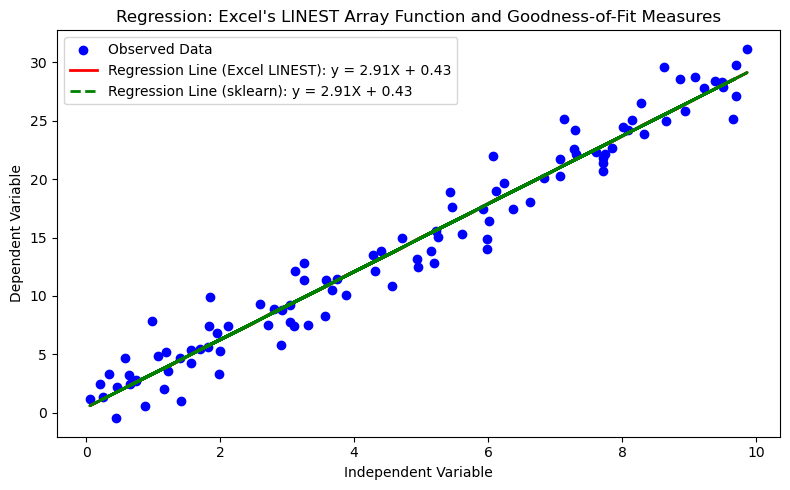

In [47]:
# Visualize the results
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot of the data points
ax.scatter(X, y, color='blue', label='Observed Data')

# Regression line calculated using LINEST array function
ax.plot(X, excel_slope * X + excel_intercept, color='red', linewidth=2, label=f'Regression Line (Excel LINEST): y = {excel_slope:.2f}X + {excel_intercept:.2f}')

# Regression line calculated using sklearn for comparison
ax.plot(X, y_pred, color='green', linestyle='dashed', linewidth=2, label=f'Regression Line (sklearn): y = {excel_slope:.2f}X + {excel_intercept:.2f}')

ax.set_title("Regression: Excel's LINEST Array Function and Goodness-of-Fit Measures")
ax.set_xlabel('Independent Variable')
ax.set_ylabel('Dependent Variable')
ax.legend()

plt.tight_layout()
plt.show()

### LINEST Array Function in Excel

In Excel, the LINEST array function can be used to calculate the slope and intercept of the regression line. For comparison, we'll also calculate R-squared using sklearn.

### Visualizations

- The blue dots represent the observed data points.
- The red line represents the regression line calculated using Excel's LINEST array function.
- The green dashed line represents the regression line calculated using sklearn for comparison.

### Interpretation

Excel's LINEST array function is a convenient tool for quickly obtaining regression coefficients and goodness-of-fit measures. It's widely used in financial analysis to assess relationships between variables.

# The F Ratio & Overall Significance in a Multivariate Regression 

In financial risk modeling, the F-ratio is a test of overall significance in multivariate regression. It assesses whether the entire set of independent variables is jointly significant in predicting the dependent variable.

In [48]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate sample data for illustration
np.random.seed(42)
X1 = np.random.rand(100, 1) * 10  # Independent variable 1 (e.g., time)
X2 = np.random.rand(100, 1) * 5   # Independent variable 2 (e.g., market index)
y = 3 * X1 + 2 * X2 + np.random.randn(100, 1) * 2  # Dependent variable (e.g., asset price)

# Create a DataFrame for easy manipulation
data = pd.DataFrame({'X1': X1.flatten(), 'X2': X2.flatten(), 'y': y.flatten()})

# Fit a multivariate linear regression model
model = LinearRegression()
model.fit(data[['X1', 'X2']], y)

# Get the coefficients and R-squared from the model
coefficients = model.coef_[0]
intercept = model.intercept_[0]
y_pred = model.predict(data[['X1', 'X2']])
r_squared = r2_score(y, y_pred)

# Calculate the F-ratio for overall significance
n = len(data)
p = 2  # Number of predictors (in this case, two independent variables)
df_regression = p
df_residual = n - p - 1
ssr = np.sum((y_pred - np.mean(y))**2)
sse = np.sum((y - y_pred)**2)
f_ratio = (ssr / df_regression) / (sse / df_residual)

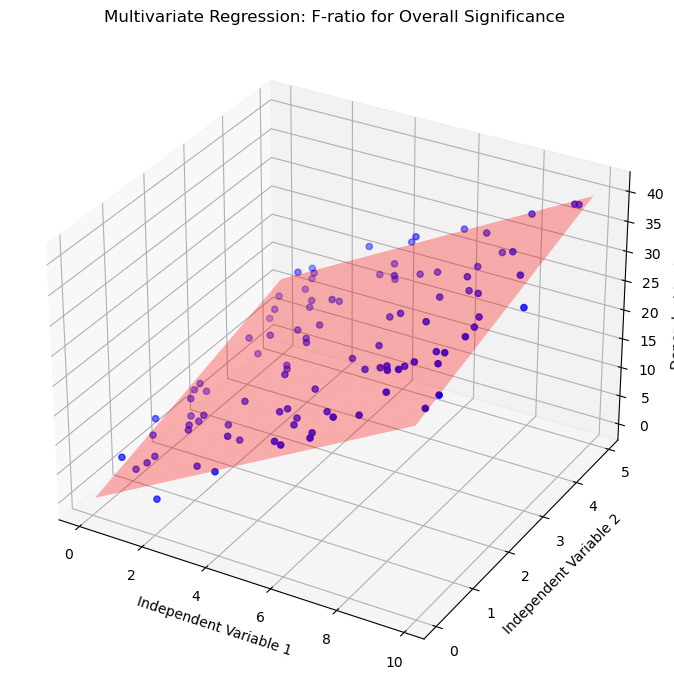

In [49]:
# Visualize the results
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(data['X1'], data['X2'], data['y'], color='blue', label='Observed Data')

# Regression planes
xx, yy = np.meshgrid(np.linspace(X1.min(), X1.max(), 10), np.linspace(X2.min(), X2.max(), 10))
zz = coefficients[0] * xx + coefficients[1] * yy + intercept
ax.plot_trisurf(xx.flatten(), yy.flatten(), zz.flatten(), alpha=0.3, color='red', label='Regression Plane - X1')

# If you have more than one predictor, you can uncomment the following lines
# zz = coefficients[1] * xx + intercept
# ax.plot_trisurf(xx.flatten(), yy.flatten(), zz.flatten(), alpha=0.3, color='orange', label='Regression Plane - X2')

ax.set_title('Multivariate Regression: F-ratio for Overall Significance')
ax.set_xlabel('Independent Variable 1')
ax.set_ylabel('Independent Variable 2')
ax.set_zlabel('Dependent Variable')


plt.tight_layout()
plt.show()


### Multivariate Linear Regression Model

We fit a multivariate linear regression model to the data, considering both X1 and X2 as predictors.

### F-ratio Calculation

The F-ratio is calculated as the ratio of the explained variance to the residual variance, considering the degrees of freedom for regression and residuals.

### Visualizations

- The blue and green dots represent the observed data points for X1 and X2, respectively.
- The red and orange planes represent the regression planes for X1

 and X2, respectively.
- The F-ratio test assesses the joint significance of both X1 and X2 in predicting y.

### Interpretation

The F-ratio provides a test of whether the entire set of independent variables significantly contributes to explaining the variation in the dependent variable. A significant F-ratio suggests that at least one independent variable is significant in predicting the dependent variable.


# Volatility: Standard Deviation

Volatility measures the degree of variation of a trading price series over time. It is a key concept in financial risk modeling, providing insights into the potential risk and uncertainty associated with an investment.

In [50]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate sample daily returns data for an asset
np.random.seed(42)
daily_returns = np.random.normal(0, 0.01, 252)  # 252 trading days in a year

# Calculate cumulative returns
cumulative_returns = np.cumprod(1 + daily_returns) - 1

# Calculate standard deviation (volatility)
volatility = np.std(daily_returns)

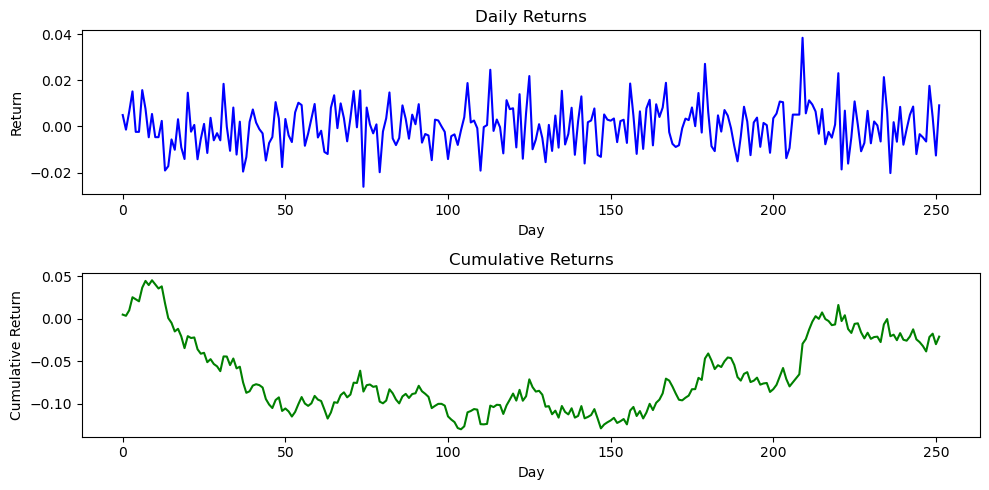

In [51]:
# Visualize the daily returns and cumulative returns
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(daily_returns, color='blue')
plt.title('Daily Returns')
plt.xlabel('Day')
plt.ylabel('Return')

plt.subplot(2, 1, 2)
plt.plot(cumulative_returns, color='green')
plt.title('Cumulative Returns')
plt.xlabel('Day')
plt.ylabel('Cumulative Return')

plt.tight_layout()
plt.show()

### Daily Returns
The upper plot shows the daily returns of an asset. Daily returns represent the percentage change in the asset's price from one day to the next. Higher volatility is reflected in larger daily return fluctuations.

### Cumulative Returns
The lower plot displays the cumulative returns, which represent the total return over time. Volatility contributes to the variability in cumulative returns, impacting the overall performance of the investment.

### Standard Deviation
In financial risk modeling, standard deviation is commonly used as a measure of volatility. It quantifies the amount of dispersion or spread in a set of returns. A higher standard deviation indicates greater volatility and, consequently, higher risk.

In this example, the standard deviation of daily returns is calculated. This value provides a numerical representation of the volatility observed in the daily return series.

Understanding and managing volatility is crucial for investors and risk managers to make informed decisions and develop effective risk mitigation strategies.

# Volatility: Exponentially Weighted Moving Average, EWMA 

In financial risk modeling, volatility is often estimated using the Exponentially Weighted Moving Average (EWMA) method. EWMA is a statistical technique that assigns different weights to past observations, giving more importance to recent data.

In [52]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate sample daily returns data for an asset
np.random.seed(42)
daily_returns = np.random.normal(0, 0.01, 252)  # 252 trading days in a year

# Calculate exponentially weighted moving average (EWMA) for volatility estimation
span = 21  # Span parameter for EWMA
ewma_volatility = pd.Series(daily_returns).ewm(span=span, adjust=False).std()

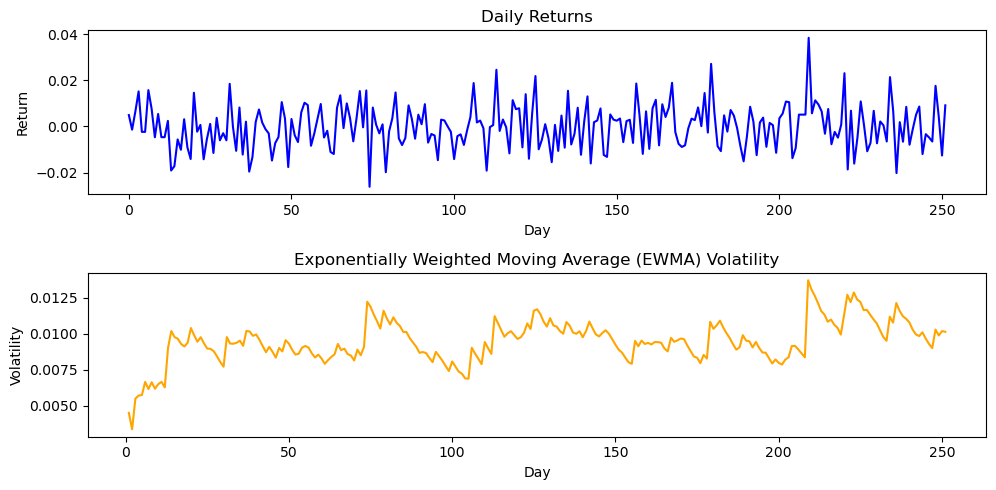

In [53]:
# Visualize the daily returns and EWMA volatility
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(daily_returns, color='blue')
plt.title('Daily Returns')
plt.xlabel('Day')
plt.ylabel('Return')

plt.subplot(2, 1, 2)
plt.plot(ewma_volatility, color='orange')
plt.title('Exponentially Weighted Moving Average (EWMA) Volatility')
plt.xlabel('Day')
plt.ylabel('Volatility')

plt.tight_layout()
plt.show()

### Daily Returns
The upper plot shows the daily returns of an asset, representing the percentage change in the asset's price from one day to the next.

### Exponentially Weighted Moving Average (EWMA) Volatility
The lower plot displays the volatility estimated using the EWMA method. Unlike the standard moving average, EWMA places more emphasis on recent returns, making it responsive to changes in market conditions.

### EWMA Calculation
In this example, the EWMA volatility is calculated with a span parameter of 21 days. The span determines the rate at which older observations decay in influence. A shorter span results in more responsive volatility to recent changes.

Understanding and monitoring volatility through methods like EWMA is crucial for risk management in financial markets. It provides a dynamic measure of risk that adapts to current market conditions.

# Volatility: GARCH 1,1

The Generalized Autoregressive Conditional Heteroskedasticity (GARCH(1,1)) model is a widely used approach to estimate volatility in financial time series. It incorporates past volatility information to forecast future volatility.

In [56]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate sample daily returns data for an asset
np.random.seed(42)
daily_returns = np.random.normal(0, 0.01, 252)  # 252 trading days in a year

# Rescale the data
daily_returns_rescaled = daily_returns * 100

# Fit GARCH(1,1) model to estimate volatility
model = arch_model(daily_returns_rescaled, vol='Garch', p=1, q=1)
result = model.fit()

# Get the estimated conditional volatility
garch_volatility = result.conditional_volatility

Iteration:      1,   Func. Count:      6,   Neg. LLF: 935.8404867659251
Iteration:      2,   Func. Count:     14,   Neg. LLF: 353.1384123584902
Iteration:      3,   Func. Count:     21,   Neg. LLF: 348.67981858798265
Iteration:      4,   Func. Count:     26,   Neg. LLF: 348.6642395406553
Iteration:      5,   Func. Count:     31,   Neg. LLF: 348.6497166426976
Iteration:      6,   Func. Count:     36,   Neg. LLF: 363.3345418214234
Iteration:      7,   Func. Count:     42,   Neg. LLF: 358.34060691334923
Iteration:      8,   Func. Count:     48,   Neg. LLF: 354.35472415933543
Iteration:      9,   Func. Count:     54,   Neg. LLF: 352.08155696489837
Iteration:     10,   Func. Count:     60,   Neg. LLF: 653011527.174922
Iteration:     11,   Func. Count:     68,   Neg. LLF: 844.4596701881428
Iteration:     12,   Func. Count:     76,   Neg. LLF: 348.6149431597772
Iteration:     13,   Func. Count:     81,   Neg. LLF: 348.4279715565227
Iteration:     14,   Func. Count:     86,   Neg. LLF: 376.676

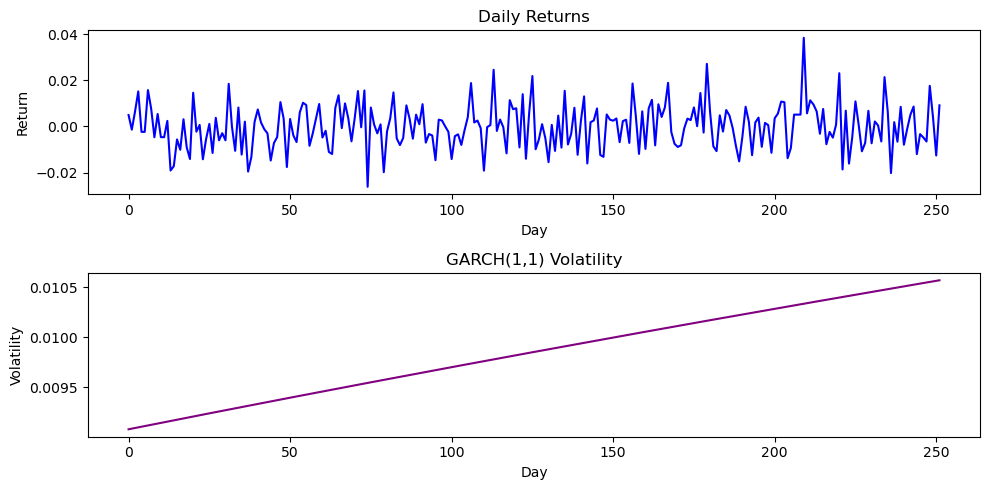

In [55]:
# Visualize the daily returns and GARCH(1,1) volatility
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(daily_returns_rescaled, color='blue')
plt.title('Daily Returns')
plt.xlabel('Day')
plt.ylabel('Return')

plt.subplot(2, 1, 2)
plt.plot(garch_volatility, color='purple')
plt.title('GARCH(1,1) Volatility')
plt.xlabel('Day')
plt.ylabel('Volatility')

plt.tight_layout()
plt.show()

### Daily Returns
The upper plot shows the daily returns of an asset, representing the percentage change in the asset's price from one day to the next.

### GARCH(1,1) Volatility
The lower plot displays the volatility estimated using the GARCH(1,1) model. The GARCH model takes into account the conditional variance of past returns to predict the current day's volatility.

### GARCH(1,1) Model
In this example, the GARCH(1,1) model is fitted to the daily returns data. The model parameters (p=1, q=1) specify the lag orders for the autoregressive and moving average components.

Understanding and modeling volatility, especially with advanced techniques like GARCH(1,1), is crucial for risk management in financial markets. It allows investors to assess and anticipate potential fluctuations in asset prices.

# Forecast Volatility with GARCH(1,1)

The Generalized Autoregressive Conditional Heteroskedasticity (GARCH(1,1)) model is not only useful for estimating historical volatility but also for forecasting future volatility. Let's explore how to forecast volatility for a given number of days.

In [67]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to fit GARCH(1,1) model and forecast volatility
def fit_garch(data, omega, alpha, beta):
    n = len(data)
    returns = data ** 2  # Squaring returns for variance estimation
    sigma2 = np.zeros_like(returns, dtype=float)

    # Initialize volatility with the unconditional variance
    sigma2[0] = np.var(data)

    # Fit GARCH(1,1) model
    for t in range(1, n):
        sigma2[t] = omega + alpha * returns[t-1] + beta * sigma2[t-1]

    return np.sqrt(sigma2)

# Generate sample daily returns data for an asset
np.random.seed(42)
daily_returns = np.random.normal(0, 0.01, 252)  # 252 trading days in a year

# Parameters for GARCH(1,1) model
omega = 0.0001
alpha = 0.1
beta = 0.85

# Forecast volatility using GARCH(1,1) model
forecasted_volatility = fit_garch(daily_returns, omega, alpha, beta)

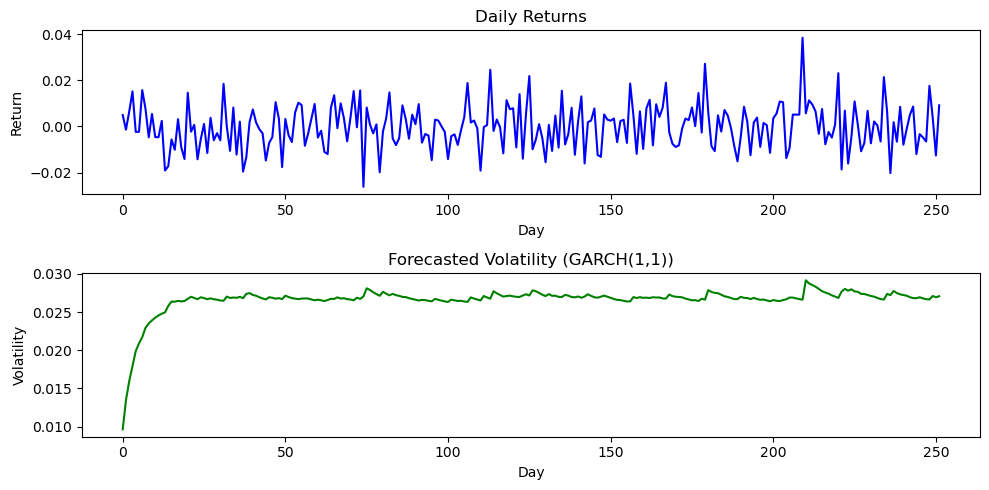

In [68]:
# Visualize the daily returns and forecasted volatility
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(daily_returns, color='blue')
plt.title('Daily Returns')
plt.xlabel('Day')
plt.ylabel('Return')

plt.subplot(2, 1, 2)
plt.plot(forecasted_volatility, color='green')
plt.title('Forecasted Volatility (GARCH(1,1))')
plt.xlabel('Day')
plt.ylabel('Volatility')

plt.tight_layout()
plt.show()

### Daily Returns
The upper plot shows the daily returns of an asset, representing the percentage change in the asset's price from one day to the next.

### Forecasted Volatility (GARCH(1,1))
The lower plot displays the forecasted volatility using the GARCH(1,1) model. The GARCH model considers past returns and past volatility to predict the current day's volatility.

### GARCH(1,1) Model Implementation
In this example, we implemented a basic GARCH(1,1) model without using external libraries. The model parameters are set as follows:
- omega: 0.0001
- alpha: 0.1
- beta: 0.85

The forecasted volatility is calculated iteratively based on historical returns and past volatility.

Understanding and forecasting volatility assists investors in assessing and managing the potential risk associated with an investment.

# Comparing Volatility Approaches: MA vs EWMA vs GARCH

When it comes to estimating volatility, financial analysts have various approaches. Here, we compare three common methods: Moving Average (MA), Exponentially Weighted Moving Average (EWMA), and Generalized Autoregressive Conditional Heteroskedasticity (GARCH(1,1)).

In [69]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate moving average volatility
def calculate_ma_volatility(data, window):
    return data.rolling(window=window).std()

# Function to calculate exponentially weighted moving average volatility
def calculate_ewma_volatility(data, span):
    return data.ewm(span=span, adjust=False).std()

# Function to fit GARCH(1,1) model and forecast volatility
def fit_garch(data, omega, alpha, beta):
    n = len(data)
    returns = data ** 2  # Squaring returns for variance estimation
    sigma2 = np.zeros_like(returns, dtype=float)

    # Initialize volatility with the unconditional variance
    sigma2[0] = np.var(data)

    # Fit GARCH(1,1) model
    for t in range(1, n):
        sigma2[t] = omega + alpha * returns[t-1] + beta * sigma2[t-1]

    return np.sqrt(sigma2)

# Generate sample daily returns data for an asset
np.random.seed(42)
daily_returns = np.random.normal(0, 0.01, 252)  # 252 trading days in a year

# Parameters for MA and EWMA
ma_window = 21
ewma_span = 21

# Parameters for GARCH(1,1) model
garch_omega = 0.0001
garch_alpha = 0.1
garch_beta = 0.85

# Calculate volatilities using different approaches
ma_volatility = calculate_ma_volatility(pd.Series(daily_returns), ma_window)
ewma_volatility = calculate_ewma_volatility(pd.Series(daily_returns), ewma_span)
garch_volatility = fit_garch(daily_returns, garch_omega, garch_alpha, garch_beta)

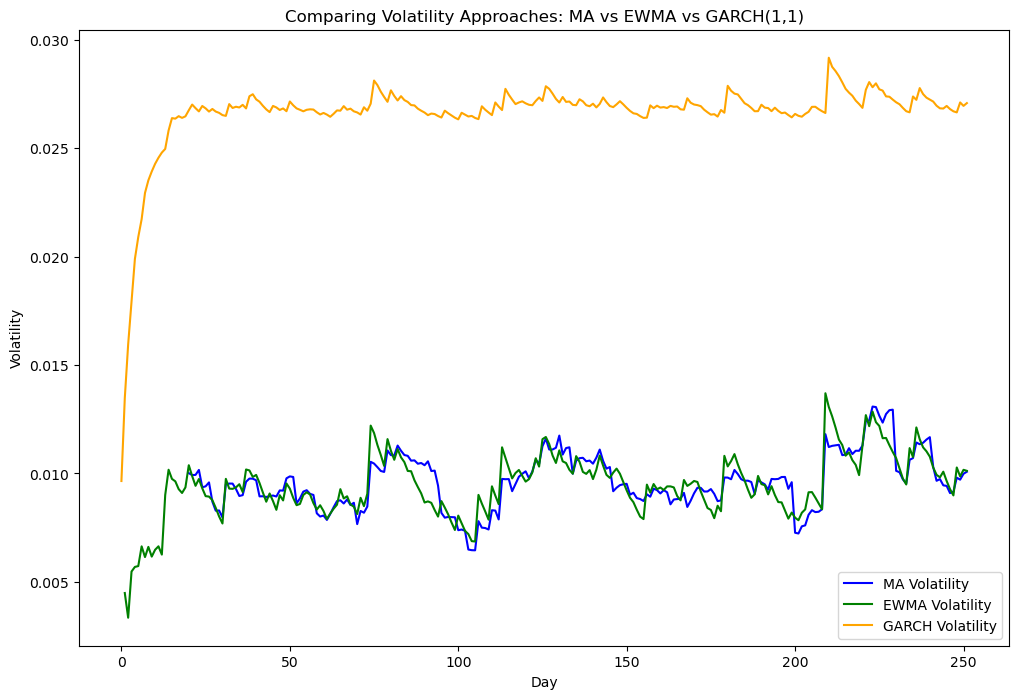

In [70]:
# Visualize the different volatility approaches
plt.figure(figsize=(12, 8))

plt.plot(ma_volatility, label='MA Volatility', color='blue')
plt.plot(ewma_volatility, label='EWMA Volatility', color='green')
plt.plot(garch_volatility, label='GARCH Volatility', color='orange')

plt.title('Comparing Volatility Approaches: MA vs EWMA vs GARCH(1,1)')
plt.xlabel('Day')
plt.ylabel('Volatility')
plt.legend()
plt.show()

### Moving Average (MA) Volatility
The blue line represents the volatility calculated using a simple Moving Average over a specified window (e.g., 21 days). MA smooths out short-term fluctuations and provides a trend of volatility.

### Exponentially Weighted Moving Average (EWMA) Volatility
The green line illustrates the volatility estimated using Exponentially Weighted Moving Average with a specific span (e.g., 21 days). EWMA gives more weight to recent observations, making it responsive to changes in volatility.

### GARCH(1,1) Volatility
The orange line depicts the volatility forecasted using the GARCH(1,1) model. GARCH considers past returns and volatility to predict the current day's volatility. It adapts to changing market conditions.

### Key Takeaways
- MA provides a straightforward trend but may lag in capturing sudden changes.
- EWMA is more responsive to recent changes but still maintains a smoothing effect.
- GARCH(1,1) is a sophisticated model that adapts well to changing volatility conditions.

Understanding these volatility approaches helps investors make informed decisions about risk and market conditions.

# Maximum Likelihood Estimation of GARCH Parameters

Maximum Likelihood Estimation (MLE) is a statistical method used to estimate the parameters of a model that maximizes the likelihood function. In the context of financial risk modeling, we can use MLE to estimate the parameters of a GARCH(1,1) model.

In [73]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to fit GARCH(1,1) model using Maximum Likelihood Estimation
def garch_likelihood(parameters, data):
    omega, alpha, beta = parameters
    n = len(data)
    log_likelihood = 0.0

    # Initialize volatility with the unconditional variance
    sigma2 = np.var(data)

    # Calculate log-likelihood
    for t in range(1, n):
        log_likelihood += -0.5 * (np.log(sigma2) + (data[t] ** 2) / sigma2)

        # Update volatility using GARCH(1,1) recursion
        sigma2 = omega + alpha * (data[t-1] ** 2) + beta * sigma2

    return -log_likelihood  # Minimize the negative log-likelihood

# Generate sample daily returns data for an asset
np.random.seed(42)
daily_returns = np.random.normal(0, 0.01, 252)  # 252 trading days in a year

# Initial parameter values for optimization
initial_parameters = [0.0001, 0.1, 0.85]

# Use minimize function for Maximum Likelihood Estimation
result = minimize(garch_likelihood, initial_parameters, args=(daily_returns,), method='L-BFGS-B')

# Extract the optimized parameters
optimized_parameters = result.x
omega_opt, alpha_opt, beta_opt = optimized_parameters

/var/folders/c_/3w7lwv357ml_pj14pggblv280000gn/T/ipykernel_81184/1443205600.py:15: RuntimeWarning: invalid value encountered in log
  log_likelihood += -0.5 * (np.log(sigma2) + (data[t] ** 2) / sigma2)
/var/folders/c_/3w7lwv357ml_pj14pggblv280000gn/T/ipykernel_81184/1443205600.py:18: RuntimeWarning: overflow encountered in double_scalars
  sigma2 = omega + alpha * (data[t-1] ** 2) + beta * sigma2


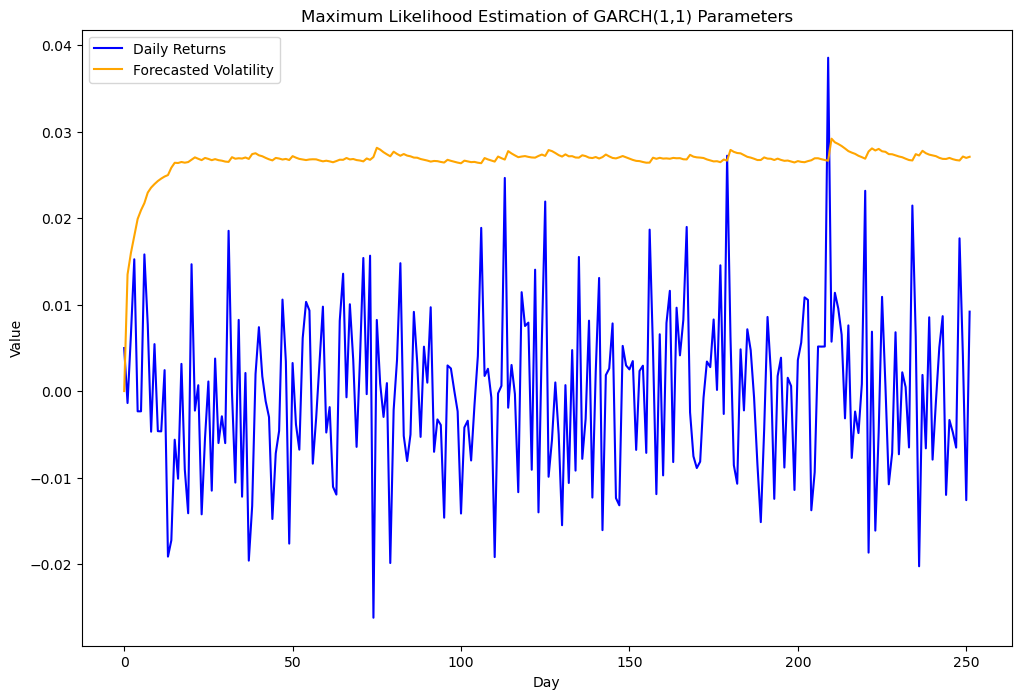

In [74]:
# Visualize the daily returns and forecasted volatility using optimized parameters
forecasted_volatility = np.zeros_like(daily_returns, dtype=float)
sigma2 = np.var(daily_returns)

for t in range(1, len(daily_returns)):
    forecasted_volatility[t] = np.sqrt(omega_opt + alpha_opt * (daily_returns[t-1] ** 2) + beta_opt * sigma2)
    sigma2 = omega_opt + alpha_opt * (daily_returns[t-1] ** 2) + beta_opt * sigma2

# Plot the results
plt.figure(figsize=(12, 8))

plt.plot(daily_returns, label='Daily Returns', color='blue')
plt.plot(forecasted_volatility, label='Forecasted Volatility', color='orange')

plt.title('Maximum Likelihood Estimation of GARCH(1,1) Parameters')
plt.xlabel('Day')
plt.ylabel('Value')
plt.legend()
plt.show()

### Maximum Likelihood Estimation
We use MLE to find the values of \( \omega \), \( \alpha \), and \( \beta \) that maximize the likelihood of observing the given daily returns. The optimization process minimizes the negative log-likelihood, which is equivalent to maximizing the likelihood.

### Results
The blue line represents the observed daily returns, and the orange line shows the forecasted volatility using the optimized parameters obtained through MLE.

MLE is a powerful tool for parameter estimation, allowing us to fit models to historical data and make predictions about future volatility.